In [1]:
from neuronunit.optimization import get_neab
# http://www.physics.usyd.edu.au/teach_res/mp/mscripts/
# ns_izh002.m
import collections
from collections import OrderedDict

# Fast spiking cannot be reproduced as it requires modifications to the standard Izhi equation,
# which are expressed in this mod file.
# https://github.com/OpenSourceBrain/IzhikevichModel/blob/master/NEURON/izhi2007b.mod

reduced2007 = collections.OrderedDict([
  #              C    k     vr  vt vpeak   a      b   c    d  celltype
  ('RS',        (100, 0.7,  -60, -40, 35, 0.03,   -2, -50,  100,  1)),
  ('IB',        (150, 1.2,  -75, -45, 50, 0.01,   5, -56,  130,   2)),
  ('LTS',       (100, 1.0,  -56, -42, 40, 0.03,   8, -53,   20,   4)),
  ('TC',        (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('TC_burst',  (200, 1.6,  -60, -50, 35, 0.01,  15, -60,   10,   6)),
  ('RTN',       (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7)),
  ('RTN_burst', (40,  0.25, -65, -45,  0, 0.015, 10, -55,   50,   7))])

import numpy as np
reduced_dict = OrderedDict([(k,[]) for k in ['C','k','vr','vt','vPeak','a','b','c','d']])

#OrderedDict
for i,k in enumerate(reduced_dict.keys()):
    for v in reduced2007.values():
        reduced_dict[k].append(v[i])
        
reduced_cells = OrderedDict([(k,[]) for k in ['RS','IB','LTS','TC','TC_burst']])

for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in reduced_dict.items():
        reduced_cells[key][k] = v[index]        

explore_param = {k:(np.min(v),np.max(v)) for k,v in reduced_dict.items()}

In [2]:
purkinje ={"id": 18, "name": "Cerebellum Purkinje cell", "neuron_db_id": 271, "nlex_id": "sao471801888"}
fi_basket = {"id": 65, "name": "Dentate gyrus basket cell", "neuron_db_id": None, "nlex_id": "nlx_cell_100201"}
pvis_cortex = {"id": 111, "name": "Neocortex pyramidal cell layer 5-6", "neuron_db_id": 265, "nlex_id": "nifext_50"}
#does not have rheobase
#olf_mitral = {"id": 129, "name": "Olfactory bulb (main) mitral cell", "neuron_db_id": 267, "nlex_id": "nlx_anat_100201"}
ca1_pyr = {"id": 85, "name": "Hippocampus CA1 pyramidal cell", "neuron_db_id": 258, "nlex_id": "sao830368389"}
pipe = [ fi_basket, ca1_pyr, purkinje,  pvis_cortex]

In [3]:
electro_tests = []
electro_frame = {}

#p_tests, p_observations = get_neab.get_neuron_criteria(olf_mitral)
#electro_frame[p["name"]] = p_observations#, p_tests))


In [4]:
electro_tests = []
obs_frame = {}
test_frame = {}
import os
import pickle
try: 

    electro_path = str(os.getcwd())+'all_tests.p'

    assert os.path.isfile(electro_path) == True
    with open(electro_path,'rb') as f:
        (obs_frame,test_frame) = pickle.load(f)

except:
    for p in pipe:
        p_tests, p_observations = get_neab.get_neuron_criteria(p)
        obs_frame[p["name"]] = p_observations#, p_tests))
        test_frame[p["name"]] = p_tests#, p_tests))
    electro_path = str(os.getcwd())+'all_tests.p'
    with open(electro_path,'wb') as f:
        pickle.dump((obs_frame,test_frame),f)

# print(test_frame)
    

In [5]:
import pandas as pd
from neuronunit.tests.fi import RheobaseTestP
#obs_frame.pop("olf_mit", 0)
#test_frame.pop("olf_mit", 0)

for k,v in test_frame.items():
    if "olf_mit" not in k:
        obs = obs_frame[k]
        v[0] = RheobaseTestP(obs['Rheobase'])


df = pd.DataFrame.from_dict(obs_frame)

print(test_frame.keys())
df['Hippocampus CA1 pyramidal cell']

dict_keys(['Dentate gyrus basket cell', 'olf_mit', 'Hippocampus CA1 pyramidal cell', 'Cerebellum Purkinje cell', 'Neocortex pyramidal cell layer 5-6'])


Cell Capacitance              {'n': 14, 'std': 53.6497639516366 pF, 'mean': ...
Input Resistance              {'n': 113, 'std': 77.577415348574 Mohm, 'mean'...
Membrane Time Constant        {'n': 46, 'std': 21.4877858716633 ms, 'mean': ...
Resting membrane potential    {'n': 110, 'std': 4.88864451466597 mV, 'mean':...
Rheobase                      {'n': 17, 'std': 287.163664156461 pA, 'mean': ...
Spike Amplitude               {'n': 64, 'std': 12.2626088055275 mV, 'mean': ...
Spike Half-Width              {'n': 59, 'std': 0.608307582372384 ms, 'mean':...
Spike Threshold               {'n': 70, 'std': 7.7267055100184 mV, 'mean': -...
Name: Hippocampus CA1 pyramidal cell, dtype: object

In [6]:
##### 
from neuronunit.optimization import optimization_management as om
import pickle


free_params = ['a','b','k','c','C','d','vPeak','vr']#vt','c','k','d']#,'vt','k','c','C']#,'C'] # this can only be odd numbers.

##
# Use information that is available
##
hc_ = reduced_cells['RS']

hc_['vr'] = -65.2261863636364

hc_['vPeak'] = hc_['vr'] + 86.364525297619

explore_param['C'] = (hc_['C']-20,hc_['C']+20)
explore_param['vr'] = (hc_['vr']-5,hc_['vr']+5)
#hc = {}
#hc['C'] = 89.7960714285714


use_test = test_frame["Neocortex pyramidal cell layer 5-6"]

from sciunit import scores# score_type 

#for t in use_test[::-1]:
#    t.score_type = scores.RatioScore
#print(use_test)
reduced_tests = [use_test[0], use_test[-2], use_test[len(use_test)-1]]
bigger_tests = use_test[1:-2]
bigger_tests.insert(0,use_test[0])

test_opt = {}
import pickle

with open('data_dump.p','wb') as f:
    pickle.dump(test_opt,f)


    


In [7]:
print(reduced_cells.keys())
print(test_frame.keys())


odict_keys(['RS', 'IB', 'LTS', 'TC', 'TC_burst'])
dict_keys(['Dentate gyrus basket cell', 'olf_mit', 'Hippocampus CA1 pyramidal cell', 'Cerebellum Purkinje cell', 'Neocortex pyramidal cell layer 5-6'])


In [8]:

from neuronunit.optimization.data_transport_container import DataTC
from neuronunit.tests.fi import RheobaseTestP# as discovery
from neuronunit.optimization.optimization_management import dtc_to_rheo, format_test, nunit_evaluation


list_to_frame = []
for k,v in reduced_cells.items():
    temp = {}
    temp[str(v)] = {}

    for key, use_test in test_frame.items():
        
        dtc = DataTC()
        dtc.tests = use_test
        print(k,v)    
        dtc.attrs = v
        dtc = dtc_to_rheo(dtc)
        dtc = format_test(dtc)
        dtc = nunit_evaluation(dtc)
        print(dtc.rheobase)
       
    temp[str(v)][str(key)] = dtc.get_ss()

    list_to_frame.append(temp)
df = pd.DataFrame(list_to_frame)
df
        #bridge_judge


RS {'b': -2, 'k': 0.7, 'vt': -40, 'c': -50, 'vPeak': 21.138338933982595, 'd': 100, 'vr': -65.2261863636364, 'a': 0.03, 'C': 100}


/opt/conda/lib/python3.5/site-packages/sciunit/scores/complete.py:73: RuntimeWarning: divide by zero encountered in true_divide
  value = (p_value - o_mean)/o_std


0.34072307194095675
0.06934990431874699
0.3840220829285794
0.8697608821500574
4.864484681732506e-08
0.0003989493285814216
5.33574506069
88.5390625 pA
RS {'b': -2, 'k': 0.7, 'vt': -40, 'c': -50, 'vPeak': 21.138338933982595, 'd': 100, 'vr': -65.2261863636364, 'a': 0.03, 'C': 100}
0.37491563188356114
0.058946364438975385
0.0
0.12391858895694818
0.032135707245898315
2.1399757434537037e-05
0.09443293500009742
6.31562937272
{'value': array(88.5390625) * pA}
RS {'b': -2, 'k': 0.7, 'vt': -40, 'c': -50, 'vPeak': 21.138338933982595, 'd': 100, 'vr': -65.2261863636364, 'a': 0.03, 'C': 100}
0.5623687618023698
0.4246713393962628
0.5959033540079748
0.9028110235081455
0.5172300904491902
0.0015276607003580356
0.005985998435749984
4.26366911722
88.5390625 pA
RS {'b': -2, 'k': 0.7, 'vt': -40, 'c': -50, 'vPeak': 21.138338933982595, 'd': 100, 'vr': -65.2261863636364, 'a': 0.03, 'C': 100}
0.2466034259328943
0.054701419627883774
0.4525570357929092
0.0071503859789798785
0.015795402982022866
0.0031361884031508

/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.3115176408181135
0.19650303312559925
4.4728484827061266e-07
6.25051323665
312.5 pA
IB {'b': 5, 'k': 1.2, 'vt': -45, 'c': -56, 'vPeak': 50, 'd': 130, 'vr': -75, 'a': 0.01, 'C': 150}
0.16687304898880784
0.01676133867075802
0.0
0.0006151041603376095
0.0009140094904025453
0.5638957856814992
0.018480832739444786
6.23245988027
{'value': array(312.5) * pA}
IB {'b': 5, 'k': 1.2, 'vt': -45, 'c': -56, 'vPeak': 50, 'd': 130, 'vr': -75, 'a': 0.01, 'C': 150}
0.28554242215013625
0.31208006557394896
0.6416508968583736
0.04047494469874113
0.20619934629505032
0.21737113176364176
0.0006457844349621045
5.62828143165
312.5 pA
IB {'b': 5, 'k': 1.2, 'vt': -45, 'c': -56, 'vPeak': 50, 'd': 130, 'vr': -75, 'a': 0.01, 'C': 150}
0.08760224858921839
0.05304343035573966
0.015383086413973568
0.47438398393561854
0.9994183791957365
0.0002232495159963932
4.95230699218
312.5 pA
IB {'b': 5, 'k': 1.2, 'vt': -45, 'c': -56, 'vPeak': 50, 'd': 130, 'vr': -75, 'a': 0.01, 'C': 150}
0.21414023442321628
0.07645949650827255
0.7

,"{'b': -2, 'k': 0.7, 'vt': -40, 'c': -50, 'vPeak': 21.138338933982595, 'd': 100, 'vr': -65.2261863636364, 'a': 0.03, 'C': 100}","{'b': 15, 'k': 1.6, 'vt': -50, 'c': -60, 'vPeak': 35, 'd': 10, 'vr': -60, 'a': 0.01, 'C': 200}","{'b': 5, 'k': 1.2, 'vt': -45, 'c': -56, 'vPeak': 50, 'd': 130, 'vr': -75, 'a': 0.01, 'C': 150}","{'b': 8, 'k': 1.0, 'vt': -42, 'c': -53, 'vPeak': 40, 'd': 20, 'vr': -56, 'a': 0.03, 'C': 100}"
0,{'Neocortex pyramidal cell layer 5-6': 4.65988...,NaN,NaN,NaN
1,NaN,NaN,{'Neocortex pyramidal cell layer 5-6': 5.36818...,NaN
2,NaN,NaN,NaN,{'Neocortex pyramidal cell layer 5-6': 6.31649...
3,NaN,{'Neocortex pyramidal cell layer 5-6': 5.97797...,NaN,NaN
4,NaN,{'Neocortex pyramidal cell layer 5-6': 5.97797...,NaN,NaN


In [9]:
from neuronunit.tests import dm 
dmtests = dm.Druckmann2013Test
d_tests = []
for d in dir(dm):
    if "Test" in d:
        exec('d_tests.append(dm.'+str(d)+')')


hello
hello
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_bind_score', '_class', '_extra', '_id', '_judge', '_properties', '_state', '_url', 'aggregate_repetitions', 'bind_score', 'check', 'check_capabilities', 'check_capability', 'check_prediction', 'check_score_type', 'compute_score', 'converter', 'current_length', 'describe', 'description', 'dict_hash', 'ephysprop_name', 'generate_prediction', 'generate_repetition_prediction', 'get_APs', 'get_ISIs', 'get_remote', 'get_remote_url', 'get_repo', 'get_version', 'hash', 'id', 'is_test_class', 'json', 'judge', 'name', 'neuroelectro_pooled_observation', 'neuroelectro_summary_observation', 'nonunited_observation_keys', 'observation', 'optimize', 'par

In [10]:

'''
MU = 6
NGEN = 200

import pickle
import numpy as np

    
index, DO = om.run_ga(explore_param,NGEN,[dmtests],free_params=free_params, NSGA = False, MU = MU)
'''

'\nMU = 6\nNGEN = 200\n\nimport pickle\nimport numpy as np\n\n    \nindex, DO = om.run_ga(explore_param,NGEN,[dmtests],free_params=free_params, NSGA = False, MU = MU)\n'

In [11]:
'''
MU = 6
NGEN = 200

import pickle

import numpy as np
try:
    with open('multi_objective.p','rb') as f:
        test_opt = pickle.load(f)
except:

for index, use_test in enumerate(test_frame.values()):

    if index % 2 == 0:
        index, DO = om.run_ga(explore_param,NGEN,use_test,free_params=free_params, NSGA = False, MU = MU)
    else:
        index, DO = om.run_ga(explore_param,NGEN,use_test,free_params=free_params, NSGA = False, MU = MU)
    #print(NSGA)

    print('can get as low as 2.70295, 2.70679')

    test_opt =  {str('multi_objective')+str(index):npcl}
    with open('multi_objective.p','wb') as f:
        pickle.dump(test_opt,f)


print(np.sum(list(test_opt['multi_objective']['pf'][2].dtc.scores.values())))
print(np.sum(list(test_opt['multi_objective']['pf'][1].dtc.scores.values())))
#print(np.sum(list(test_opt['multi_objective']['hof'][0].dtc.scores.values())))
print(test_opt['multi_objective']['pf'][2].dtc.scores.items())
print(test_opt['multi_objective']['pf'][1].dtc.scores.items())
'''


"\nMU = 6\nNGEN = 200\n\nimport pickle\n\nimport numpy as np\ntry:\n    with open('multi_objective.p','rb') as f:\n        test_opt = pickle.load(f)\nexcept:\n\nfor index, use_test in enumerate(test_frame.values()):\n\n    if index % 2 == 0:\n        index, DO = om.run_ga(explore_param,NGEN,use_test,free_params=free_params, NSGA = False, MU = MU)\n    else:\n        index, DO = om.run_ga(explore_param,NGEN,use_test,free_params=free_params, NSGA = False, MU = MU)\n    #print(NSGA)\n\n    print('can get as low as 2.70295, 2.70679')\n\n    test_opt =  {str('multi_objective')+str(index):npcl}\n    with open('multi_objective.p','wb') as f:\n        pickle.dump(test_opt,f)\n\n\nprint(np.sum(list(test_opt['multi_objective']['pf'][2].dtc.scores.values())))\nprint(np.sum(list(test_opt['multi_objective']['pf'][1].dtc.scores.values())))\n#print(np.sum(list(test_opt['multi_objective']['hof'][0].dtc.scores.values())))\nprint(test_opt['multi_objective']['pf'][2].dtc.scores.items())\nprint(test_opt['

In [20]:
try:
    with open('data_dump.p','rb') as f:
        test_opt = pickle.load(f)
except:
    MU = 12
    NGEN = 25
    cnt = 1
    for t in use_test:        
        if cnt==len(use_test):
            MU = 12
            NGEN = 20

            npcl, DO = om.run_ga(explore_param,NGEN,[t],free_params=free_params, NSGA = True, MU = MU)
        else:

            npcl, DO = om.run_ga(explore_param,NGEN,[t],free_params=free_params, NSGA = True, MU = MU)

        test_opt[str(t)] =  {'out':npcl}

        ranges = {}
        stds = npcl['pop'][0].dtc.attrs
        for k in npcl['pop'][0].dtc.attrs.keys():    
            stds[k] = []
            ranges[k] = []


        for i in npcl['pop'][::5]:
            for k,v in i.dtc.attrs.items():
                stds[k].append(v)
                ranges[k].append(v)

        for k in npcl['pop'][0].dtc.attrs.keys():
            ranges[k] = (np.min(ranges[k][1::]),np.max(ranges[k][1::]))

            stds[k] = np.std(stds[k][1::])
        test_opt[str(t)]['stds'] = stds 
        test_opt[str(t)]['ranges'] = ranges 

        with open('data_dump.p','wb') as f:
            pickle.dump(test_opt,f)
        cnt+=1

/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.025037183200593338
0.39576770878147305
0.7768896929109935
0.39576770878147305
0.5538167790388311
0.39576770878147305
0.6372607494914281
0.39576770878147305
0.752050371779271
0.790375586400659
0.8105131108470218
0.6925414278665485
[0.025037183200593338]
[0.39576770878147305]
[0.7768896929109935]
[0.39576770878147305]
[0.39576770878147305]
[0.39576770878147305]
[0.5538167790388311]
[0.6372607494914281]
[0.8105131108470218]
[0.6925414278665485]
[0.752050371779271]
[0.790375586400659]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.7876494211661442
0.5538167790388311
0.3743723882431731
0.5538167790388311
0.7768896929109935
0.39576770878147305
0.999999999999992
0.6852298791066583
0.5538167790388311
0.5354406233812883
0.39576770878147305
0.9999997905984923


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.19875 	0.251113	0  	0.77689 
2  	12    	0.410611	0.267859	0  	0.787649


[0.7876494211661442]
[0.5538167790388311]
[0.3743723882431731]
[0.5538167790388311]
[0.7768896929109935]
[0.39576770878147305]
[0.5538167790388311]
[0.39576770878147305]
[0.5354406233812883]
[0.9999997905984923]
[0.6852298791066583]
[0.999999999999992]
0.39576770878147305
0.5538167790388311
0.358115038078907
0.39576770878147305
0.39576770878147305
0.39576770878147305
0.025037183200593338
0.5538167790388311
0.39576770878147305
0.5717718310339781
0.5538167790388311


INFO:__main__:3  	11    	0.385021	0.178146	0.0250372	0.571772


[0.358115038078907]
[0.39576770878147305]
[0.39576770878147305]
[0.5538167790388311]
[0.39576770878147305]
[0.39576770878147305]
[0.025037183200593338]
[0.5538167790388311]
[0.39576770878147305]
[0.5717718310339781]
[0.5538167790388311]
0.025037183200593338
0.025037183200593338
0.358115038078907
0.3743723882431731
0.16795931394682606
0.5538167790388311
0.39576770878147305
0.5538167790388311
0.5538167790388311
0.21657179076136512
0.39576770878147305


INFO:__main__:4  	11    	0.334654	0.180482	0.0250372	0.553817


[0.025037183200593338]
[0.025037183200593338]
[0.358115038078907]
[0.3743723882431731]
[0.39576770878147305]
[0.5538167790388311]
[0.16795931394682606]
[0.5538167790388311]
[0.5538167790388311]
[0.21657179076136512]
[0.39576770878147305]
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.16795931394682606
0.35265703804059545
0.025037183200593338
0.3743723882431731
0.36355375968293124
0.377064616386913
0.025037183200593338
0.5354406233812883
0.39576770878147305


INFO:__main__:5  	12    	0.240295	0.174862	0.0250372	0.535441


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.16795931394682606]
[0.35265703804059545]
[0.377064616386913]
[0.3743723882431731]
[0.36355375968293124]
[0.5354406233812883]
[0.39576770878147305]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.16795931394682606
0.025037183200593338
0.025037183200593338
0.21657179076136512


INFO:__main__:6  	9     	0.08078 	0.0800715	0.0250372	0.216572


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.16795931394682606]
[0.21657179076136512]
[0.21657179076136512]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:7  	11    	0.0250372	0        	0.0250372	0.0250372


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:8  	12    	0.0250372	0        	0.0250372	0.0250372


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:9  	10    	0.0409984	0.0529374	0.0250372	0.216572 


[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338


INFO:__main__:10 	11    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
0.16795931394682606
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:11 	11    	0.0529086	0.0631074	0.0250372	0.216572 


[0.16795931394682606]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:12 	11    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.16795931394682606
0.025037183200593338


INFO:__main__:13 	12    	0.0688698	0.0767801	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.16795931394682606]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:14 	12    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:15 	11    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:16 	10    	0.0569596	0.0713807	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:17 	12    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:18 	9     	0.0250372	0        	0.0250372	0.0250372


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.21657179076136512
0.025037183200593338
0.025037183200593338


INFO:__main__:19 	11    	0.0729208	0.0829369	0.0250372	0.216572 


[0.025037183200593338]
[0.21657179076136512]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:20 	10    	0.0250372	0        	0.0250372	0.0250372


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.16795931394682606
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512


INFO:__main__:21 	12    	0.0529086	0.0631074	0.0250372	0.216572 


[0.025037183200593338]
[0.16795931394682606]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.16795931394682606


INFO:__main__:22 	11    	0.084831 	0.0854301	0.0250372	0.216572 


[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.21657179076136512]
[0.16795931394682606]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:23 	10    	0.0250372	0        	0.0250372	0.0250372


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.21657179076136512
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338


INFO:__main__:24 	12    	0.0409984	0.0529374	0.0250372	0.216572 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.21657179076136512]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.025037183200593338
0.19309487499679268


INFO:__main__:25 	9     	0.039042 	0.0464487	0.0250372	0.193095 


[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.025037183200593338]
[0.19309487499679268]
[0.025037183200593338]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

4.965725579619829e-07
0.19905904517762063
0.999999503427442
0.25008768867028
0.74991231132972
0.8009409548223794
0.359620123612723
0.640379876387277
0.25008768867028
0.74991231132972
0.4084905546013424
0.5915094453986576
0.17000082962533936
0.0
0.8299991703746606
1.0
0.2928776790248998
0.29341542918067864
0.7071223209751002
0.7065845708193214
gets to None score type
0.0
0.7963715391862585
0.20362846081374153
[0.8009409548223794]
[0.5915094453986576]
[0.999999503427442]
[0.640379876387277]
[0.74991231132972]
[0.74991231132972]
[1.0]
[0.7065845708193214]
[]
[0.20362846081374153]
[0.8299991703746606]
[0.7071223209751002]
0.2569394232601073
0.7430605767398927
0.3802857574647859
0.6197142425352141
6.328585087755911e-06
0.9999936714149122
0.2664639716359172
0.29427014720182
0.70572985279818
0.7335360283640828
3.339550858072471e-12
0.9999999999966604
0.00281798923528509
0.9971820107647149
0.2664441103151899
0.7335558896848101
0.8963297833350197
0.10367021666498033
0.25074926163996536
0.749250

INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.377721	0.388816	0  	1       
2  	12    	0.580256	0.353189	0  	0.999994


[0.9999936714149122]
[0.7550092978933157]
[0.7335360283640828]
[0.7335558896848101]
[0.9971820107647149]
[0.6317740395042534]
[0.6197142425352141]
[0.7492507383600346]
[0.7430605767398927]
[0.10367021666498033]
[0.70572985279818]
[0.9999999999966604]
0.40523742644558935
0.5947625735544106
0.2878923116437774
0.23147263701590381
0.7121076883562226
0.7685273629840962
0.7198697747512053
0.2801302252487947
0.25208217339757844
0.7479178266024216
0.27699440568524647
0.7230055943147535
0.2664441103151899
0.7335558896848101
0.25541466193829365
0.2524639827530134
0.7475360172469866
0.34144991057027807
0.6585500894297219
0.7445853380617063


INFO:__main__:3  	10    	0.661881	0.129104	0.28013	0.768527


[0.2801302252487947]
[0.6585500894297219]
[0.5947625735544106]
[0.7230055943147535]
[0.7121076883562226]
[0.7335558896848101]
[0.7479178266024216]
[0.7475360172469866]
[0.7685273629840962]
[0.7445853380617063]
0.5794500311339739
0.42054996886602614
0.10199750770291072
0.8980024922970893
0.4084905481607328
0.464197971702314
0.5915094518392672
0.535802028297686
0.3240567068422461
0.6759432931577539
0.25108722344477563
0.7489127765552244
0.3704086996611802
0.6295913003388198
0.37403876413023984
0.6259612358697602


INFO:__main__:4  	8     	0.621476	0.153966	0.28013	0.898002


[0.8980024922970893]
[0.5915094518392672]
[0.6259612358697602]
[0.6295913003388198]
[0.6759432931577539]
[0.535802028297686]
[0.7489127765552244]
[0.42054996886602614]
0.4052621433531006
0.5947378566468994
0.38025239493671503
0.619747605063285
0.4953055843524862
0.5046944156475138
0.3665531128131152
0.6334468871868848
0.40849054815403285
0.5915094518459671
0.33172373451175663
0.6682762654882434
0.6159744839247556
0.3840255160752444
0.3185614580181749
0.6814385419818251
0.6464982307821374
0.3535017692178626
0.6464924309360454
0.35350756906395464


INFO:__main__:5  	10    	0.55337 	0.117476	0.353502	0.681439


[0.3535017692178626]
[0.35350756906395464]
[0.3840255160752444]
[0.6814385419818251]
[0.5046944156475138]
[0.5915094518459671]
[0.5947378566468994]
[0.619747605063285]
[0.6334468871868848]
[0.6682762654882434]
0.3963774462513603
0.6036225537486397
0.32313506818050675
0.6768649318194933
0.4911529447457138
0.6550040303096349
0.37572492296699433
0.6242750770330057
0.5088470552542862
0.34499596969036506
0.5502704126986355
0.4497295873013645
0.40849055408102364
0.6046931435045609
0.39530685649543906
0.5915094459189764
0.5319550824471542
0.46804491755284583
0.40831863160634563
0.5916813683936544
0.6788876735664064
0.32111232643359355
0.38111221983587096
0.618887780164129


INFO:__main__:6  	12    	0.51624 	0.113954	0.321112	0.676865


[0.6242750770330057]
[0.46804491755284583]
[0.34499596969036506]
[0.32111232643359355]
[0.6768649318194933]
[0.4497295873013645]
[0.5088470552542862]
[0.39530685649543906]
[0.5915094459189764]
[0.618887780164129]
[0.6036225537486397]
[0.5916813683936544]
0.46708726919924637
0.5329127308007536
0.09263175722412287
0.9073682427758771
0.6659735420297548
0.3340264579702452
0.6334888609233529
0.3877589389294276
0.3665111390766471
0.6122410610705724
0.6868792440862699
0.3131207559137301
0.5502702020578412
0.44972979794215884
0.5054162475524531
0.49458375244754693
0.8580118850336993
0.1419881149663007
0.8326152509854277
0.16738474901457234


INFO:__main__:7  	10    	0.416207	0.198009	0.141988	0.907368


[0.3665111390766471]
[0.1419881149663007]
[0.3131207559137301]
[0.16738474901457234]
[0.5329127308007536]
[0.9073682427758771]
[0.3340264579702452]
[0.44972979794215884]
[0.6122410610705724]
[0.49458375244754693]


/opt/conda/lib/python3.5/site-packages/deap/tools/crossover.py:333: RuntimeWarning: invalid value encountered in double_scalars
  beta_q = (1.0 / (2.0 - rand * alpha))**(1.0 / (eta + 1))
/opt/conda/lib/python3.5/site-packages/deap/tools/crossover.py:324: RuntimeWarning: invalid value encountered in double_scalars
  beta_q = (1.0 / (2.0 - rand * alpha))**(1.0 / (eta + 1))


0.9158338363508216
0.0841661636491784
0.6046465993714387
0.3953534006285613
0.5512010601978798
0.6484016805880528
0.44879893980212016
0.3515983194119472
0.7065547674519648
0.29344523254803523
0.44643326986394616
0.5535667301360538
0.4919036744035641
0.5080963255964359
0.6982771573996458
0.3017228426003542
0.6890879962606928
0.31091200373930716


INFO:__main__:8  	9     	0.333164	0.134911	0.0841662	0.553567


[0.0841661636491784]
[0.5080963255964359]
[0.3953534006285613]
[0.31091200373930716]
[0.3515983194119472]
[0.3017228426003542]
[0.29344523254803523]
[0.5535667301360538]
[0.44879893980212016]
0.9124288929814306
0.0875711070185694
0.6671265268408093
0.3328734731591907
0.6868792005112329
0.31312079948876714
0.6969806424943916
0.3030193575056084
0.6579474028341359
0.3420525971658641
0.6378073874442411
0.36219261255575885
0.6675451203973578
0.3324548796026422
0.5239552116375963
0.4760447883624037
0.09525545900601173
0.9047445409939883
0.5832941405246976
0.41670585947530236


INFO:__main__:9  	10    	0.37915 	0.180603	0.0875711	0.904745


[0.3030193575056084]
[0.9047445409939883]
[0.0875711070185694]
[0.3328734731591907]
[0.3324548796026422]
[0.41670585947530236]
[0.36219261255575885]
[0.4760447883624037]
[0.31312079948876714]
[0.3420525971658641]
0.9915485124050467
0.008451487594953289
0.6868792005112329
0.31312079948876714
0.8389066095240965
0.16109339047590354
0.7569813056364287
0.24301869436357126
0.7233965144065144
0.2766034855934856
0.6582005650722906
0.34179943492770937
0.7483314823461196
0.25166851765388043
0.9682958471855398
0.03170415281446015
0.8876315442289544
0.1123684557710456


INFO:__main__:10 	9     	0.189084	0.109341	0.00845149	0.341799


[0.24301869436357126]
[0.1123684557710456]
[0.008451487594953289]
[0.34179943492770937]
[0.16109339047590354]
[0.03170415281446015]
[0.2766034855934856]
[0.25166851765388043]
[0.31312079948876714]
0.7450753543591249
0.25492464564087514
0.7756732419681123
0.22432675803188773
0.7324262029630875
0.26757379703691253
0.5021177772187602
0.49788222278123984
0.7156279318740695
0.2843720681259305
0.9985989561942936
0.0014010438057063812
0.9156836399558546
0.08431636004414544
0.642835760029959
0.357164239970041
0.9125790759323682
0.0874209240676318
0.8567475429505953
0.1432524570494047
0.8602741149559396
0.13972588504406036


INFO:__main__:11 	11    	0.203836	0.132345	0.00140104	0.497882


[0.22432675803188773]
[0.49788222278123984]
[0.08431636004414544]
[0.0874209240676318]
[0.0014010438057063812]
[0.13972588504406036]
[0.25492464564087514]
[0.1432524570494047]
[0.26757379703691253]
[0.2843720681259305]
[0.357164239970041]
0.8857231551025544
0.1142768448974456
0.1449841773028382
0.8550158226971618
0.9902270284594168
0.009772971540583208
0.9181665758450777
0.08183342415492234
0.757022384799599
0.9158338228025364
0.08416617719746355
0.24297761520040095
0.8346617074585483
0.16533829254145171
0.494786375232088
0.505213624767912
0.8963386553888153
0.1036613446111847
0.6434623819693598
0.3565376180306402
0.5332220386110793
0.4667779613889207
0.856746178443067
0.143253821556933


INFO:__main__:12 	12    	0.260735	0.234534	0.00977297	0.855016


[0.1142768448974456]
[0.3565376180306402]
[0.009772971540583208]
[0.08416617719746355]
[0.08183342415492234]
[0.16533829254145171]
[0.505213624767912]
[0.1036613446111847]
[0.8550158226971618]
[0.4667779613889207]
[0.24297761520040095]
[0.143253821556933]
0.9344806614161962
0.06551933858380377
0.9915486142669675
0.008451385733032502
0.8354250560695138
0.16457494393048622
0.9129034169180532
0.08709658308194679
0.9158338363508216
0.0841661636491784
0.07233818808791126
0.9276618119120887
0.843038311063885
0.9939625430156791
0.15696168893611495
0.006037456984320899
0.9181665770802554
0.0818334229197446
0.84495314294005
0.15504685705995003
0.9121043492094052
0.0878956507905948


INFO:__main__:13 	11    	0.0809436	0.0546707	0.00140104	0.164575


[0.008451385733032502]
[0.16457494393048622]
[0.06551933858380377]
[0.0818334229197446]
[0.0841661636491784]
[0.15696168893611495]
[0.07233818808791126]
[0.0878956507905948]
[0.08709658308194679]
[0.15504685705995003]
[0.006037456984320899]
0.9227300741353883
0.07726992586461168
0.8130600998135094
0.18693990018649065
0.5140645393860177
0.4859354606139823
0.8928490145450303
0.1071509854549697
0.9092528291306811
0.8721077961989614
0.09074717086931894
0.9344792262683828
0.1278922038010386
0.06552077373161724
0.8468549854764355
0.15314501452356455
0.901355919564129
0.09864408043587103
0.8664845056927912
0.13351549430720877
0.6799587870002017
0.32004121299979826
0.9158338363508216
0.0841661636491784


INFO:__main__:14 	12    	0.160914 	0.118046 	0.0655208 	0.485935


[0.07726992586461168]
[0.18693990018649065]
[0.09074717086931894]
[0.15314501452356455]
[0.4859354606139823]
[0.1071509854549697]
[0.06552077373161724]
[0.09864408043587103]
[0.1278922038010386]
[0.32004121299979826]
[0.13351549430720877]
[0.0841661636491784]
0.7906609636249051
0.20933903637509488
0.9276618184174819
0.9289652881720271
0.07103471182797294
0.9181665758450777
0.07233818158251815
0.7027284062240835
0.2972715937759165
0.08183342415492234
0.9344805878328513
0.06551941216714874
0.9591681418174438
0.9181665770802554
0.0818334229197446
0.8784621059217446
0.12153789407825544
0.04083185818255619
0.9670370417660124
0.03296295823398765
0.6198306333224551
0.38016936667754486


INFO:__main__:15 	11    	0.127662 	0.105124 	0.032963  	0.380169


[0.2972715937759165]
[0.12153789407825544]
[0.20933903637509488]
[0.07103471182797294]
[0.04083185818255619]
[0.38016936667754486]
[0.06551941216714874]
[0.03296295823398765]
[0.07233818158251815]
[0.0818334229197446]
[0.08183342415492234]
0.8717862983559339
0.1282137016440661
0.7429513461737809
0.2570486538262191
0.9902305550089403
0.9904190690090819
0.009580930990918057
0.009769444991059695
0.7983805456723858
0.9915486142669675
0.2016194543276142
0.008451385733032502
0.977779717586328
0.9467413486742189
0.02222028241367202
0.6138898455366748
0.053258651325781114
0.3861101544633252
0.06826921585158341
0.9915509187950908
0.00844908120490917
0.9317307841484166


INFO:__main__:16 	11    	0.0994852	0.116714 	0.00844908	0.38611 


[0.009580930990918057]
[0.053258651325781114]
[0.008451385733032502]
[0.00844908120490917]
[0.009769444991059695]
[0.3861101544633252]
[0.2016194543276142]
[0.06826921585158341]
[0.1282137016440661]
[0.2570486538262191]
[0.02222028241367202]
0.5679015208486946
0.4320984791513054
0.9671071697747025
0.03289283022529754
0.7317686250112897
0.2682313749887103
0.9783471735131843
0.021652826486815657
0.9449607871024097
0.055039212897590284
0.9531382572965177
0.04686174270348231
0.9955422745140703
0.8382660319785535
0.16173396802144646
0.004457725485929709
0.7280873526821632
0.2719126473178368
0.9682950987195071
0.03170490128049286
0.5957845845169625
0.4042154154830375
0.9645435545917144
0.03545644540828563


INFO:__main__:17 	12    	0.147188 	0.150341 	0.00445773	0.432098


[0.04686174270348231]
[0.03545644540828563]
[0.2682313749887103]
[0.021652826486815657]
[0.055039212897590284]
[0.004457725485929709]
[0.4320984791513054]
[0.03289283022529754]
[0.16173396802144646]
[0.2719126473178368]
[0.03170490128049286]
[0.4042154154830375]
0.7620548814982167
0.8021304262421691
0.23794511850178335
0.19786957375783087
0.10601749387233861
0.8939825061276614
0.9764448091423079
0.5368206143983649
0.4631793856016351
0.023555190857692088
0.6110281200742405
0.9783754218641341
0.38897187992575954
0.021624578135865935
0.9902553786458814
0.009744621354118577
0.7780425497426227
0.22195745025737734
0.9715426914915877
0.028457308508412327
0.985314915006242
0.01468508499375798
0.7779772186263406
0.22202278137365938


INFO:__main__:18 	12    	0.227    	0.248858 	0.00974462	0.893983


[0.028457308508412327]
[0.22202278137365938]
[0.8939825061276614]
[0.01468508499375798]
[0.23794511850178335]
[0.023555190857692088]
[0.19786957375783087]
[0.38897187992575954]
[0.4631793856016351]
[0.009744621354118577]
[0.021624578135865935]
[0.22195745025737734]
0.7130896475357217
0.2869103524642783
0.951515273070294
0.04848472692970596
0.7776412427684558
0.2223587572315442
0.9931068771923217
0.006893122807678287
0.6963790177535375
0.3036209822464625
0.6209809928562846
0.3790190071437154
0.8756360452952693
0.12436395470473072
0.8495307539402925
0.15046924605970746
0.6450377532282894
0.3549622467717106
0.6550484886859582
0.3449515113140418


INFO:__main__:19 	10    	0.186578 	0.14009  	0.00689312	0.379019


[0.2869103524642783]
[0.3549622467717106]
[0.006893122807678287]
[0.3449515113140418]
[0.12436395470473072]
[0.15046924605970746]
[0.04848472692970596]
[0.2223587572315442]
[0.3036209822464625]
[0.3790190071437154]
0.7726322063034432
0.2273677936965568
0.7482687726785299
0.25173122732147013
0.6388583965374444
0.5769763009362742
0.42302369906372583
0.36114160346255564
0.642487351665407
0.8559108314228294
0.35751264833459295
0.14408916857717058
0.7091982140661977
0.29080178593380235


INFO:__main__:20 	7     	0.174899 	0.155692 	0.00689312	0.423024


[0.29080178593380235]
[0.25173122732147013]
[0.2273677936965568]
[0.42302369906372583]
[0.36114160346255564]
[0.35751264833459295]
[0.14408916857717058]
0.9452935863263555
0.05470641367364448
0.9902270284594168
0.009772971540583208
0.991306015338334
0.008693984661666043
0.9645017245765799
0.0354982754234201
0.6589439355147231
0.3410560644852769
0.7615163682717354
0.2384836317282646
0.975451333638548
0.024548666361452032
0.9915486142669675
0.008451385733032502
0.9922570864335063
0.007742913566493703
0.958027245231962
0.04197275476803797


INFO:__main__:21 	10    	0.0653215	0.10368  	0.00603746	0.341056


[0.024548666361452032]
[0.04197275476803797]
[0.008693984661666043]
[0.3410560644852769]
[0.008451385733032502]
[0.007742913566493703]
[0.0354982754234201]
[0.2384836317282646]
[0.05470641367364448]
[0.009772971540583208]
0.9915512375408039
0.008448762459196124
0.9931068771923217
0.006893122807678287
0.7190247275583741
0.2809752724416259
0.9915476369996636
0.00845236300033636
0.7966734754712537
0.20332652452874633
0.751664795258058
0.24833520474194204
0.9915486142669675
0.008451385733032502
0.787203731574823
0.21279626842517696
0.5854390963588991
0.4145609036411009
0.7404887408832164
0.25951125911678363
0.9966976059581019
0.003302394041898138
0.9339576220286278
0.06604237797137225


INFO:__main__:22 	12    	0.125692 	0.140303 	0         	0.414561


[0.2809752724416259]
[0.25951125911678363]
[0.006893122807678287]
[0.06604237797137225]
[0.008448762459196124]
[0.003302394041898138]
[0.00845236300033636]
[0.008451385733032502]
[0.24833520474194204]
[0.4145609036411009]
[0.20332652452874633]
[0.21279626842517696]
0.991551059737663
0.008448940262337001
0.8467103275815522
0.15328967241844782
0.9931068339282234
0.006893166071776591
0.5824357164625744
0.4175642835374256
0.9351547978054744
0.06484520219452561
0.7028115075055211
0.2971884924944789
0.8899276897380368
0.11007231026196318
0.8454583038302976
0.15454169616970237
0.5469229308391454
0.45307706916085455


INFO:__main__:23 	9     	0.13959  	0.157583 	0.00140104	0.453077


[0.06484520219452561]
[0.45307706916085455]
[0.006893166071776591]
[0.15454169616970237]
[0.2971884924944789]
[0.11007231026196318]
[0.008448940262337001]
[0.15328967241844782]
[0.4175642835374256]
0.9301842228995706
0.06981577710042941
0.9931068771923217
0.006893122807678287
0.985576050682019
0.014423949317980966
0.8723628595328843
0.12763714046711572
0.9441835319811409
0.05581646801885909
0.8558980001794536
0.1441019998205464
0.8239563275062741
0.17604367249372588
0.4445863024173953
0.5554136975826047
0.991551059737663
0.008448940262337001


INFO:__main__:24 	9     	0.0976456	0.150144 	0.00140104	0.555414


[0.014423949317980966]
[0.5554136975826047]
[0.006893122807678287]
[0.12763714046711572]
[0.05581646801885909]
[0.17604367249372588]
[0.1441019998205464]
[0.008448940262337001]
[0.06981577710042941]
0.9896204827255879
0.010379517274412109
0.9395914882731656
0.06040851172683437
0.8780595083316916
0.7283343273487612
0.12194049166830845
0.5831308770885011
0.4168691229114989
0.27166567265123875
0.8660572282180465
0.13394277178195346
0.9922120319625443
0.007787968037455739
0.9269360504380235
0.07306394956197648
0.8482282330286948
0.15177176697130523
0.9434318056287381
0.056568194371261926
0.8427858013588743
0.15721419864112574
0.5379974850377558
0.4620025149622442


INFO:__main__:25 	12    	0.160301 	0.143058 	0.00778797	0.462003


[0.010379517274412109]
[0.056568194371261926]
[0.4168691229114989]
[0.4620025149622442]
[0.27166567265123875]
[0.15721419864112574]
[0.06040851172683437]
[0.12194049166830845]
[0.007787968037455739]
[0.15177176697130523]
[0.13394277178195346]
[0.07306394956197648]
0.0
1.0
0.05869111165424168
0.9413088883457583


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.04438672444047864
0.07510597050726386
0.9556132755595214
0.9248940294927361
0.05869111165424168
0.9413088883457583
0.05627578947665646
0.9437242105233435


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.03673122467533341
0.9632687753246666
0.7195839358350611
0.2804160641649389
0.04735567798022633
0.9526443220197737
0.08108372269633979
0.9189162773036602
0.04235464050672977
0.9576453594932702
0.04594151583647876
0.9540584841635212
[0.9556132755595214]
[0.9437242105233435]
[1.0]
[0.9248940294927361]
[0.9413088883457583]
[0.9413088883457583]
[0.9632687753246666]
[0.9576453594932702]
[0.9526443220197737]
[0.9540584841635212]
[0.2804160641649389]
[0.9189162773036602]
0.0675543755879805
0.9324456244120195
0.060876413149126285
0.9391235868508737


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.0349106147250452
0.9650893852749548
0.08055342530522824
0.0934124836711584
0.9194465746947718
0.9065875163288416
7.296385717836529e-12
0.9999999999927036
1.1763412466336831e-09
0.9999999988236588
0.048877008345491246
0.9511229916545088
0.0905839292965337
0.9094160707034663
0.05973002864817878
0.9402699713518212


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.03224554391101908
0.9677544560889809
0.050269419644124236
0.9497305803558758


INFO:__main__:gen	nevals	avg     	std     	min	max
1  	12    	0.475571	0.475864	0  	1  
2  	12    	0.719378	0.415928	0  	1  


[0.9999999999927036]
[0.9511229916545088]
[0.9194465746947718]
[0.9497305803558758]
[0.9999999988236588]
[0.9677544560889809]
[0.9650893852749548]
[0.9402699713518212]
[0.9391235868508737]
[0.9094160707034663]
[0.9324456244120195]
[0.9065875163288416]


/opt/conda/lib/python3.5/site-packages/deap/tools/mutation.py:80: RuntimeWarning: invalid value encountered in double_scalars
  delta_q = val**mut_pow - 1.0


0.04976389995139785
0.9502361000486022


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.07308256036578897
0.926917439634211
0.08026185307981626
0.9197381469201837
0.05962113903619182
0.9403788609638082
0.06286048709033953
0.9371395129096605
0.04916635653810997
0.95083364346189
0.06514619228919727
0.9348538077108027
0.0675085769434679
0.9324914230565321


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.07510597050726386
0.9248940294927361
0.05869111165424168
0.9413088883457583


INFO:__main__:3  	10    	0.935164	0.0103302	0.919447	0.950834


[0.9197381469201837]
[0.9248940294927361]
[0.926917439634211]
[0.9324914230565321]
[0.9403788609638082]
[0.9348538077108027]
[0.9371395129096605]
[0.9413088883457583]
[0.9502361000486022]
[0.95083364346189]
0.06286048709033953
0.9371395129096605
0.06459334755815649
0.06632010971246816
0.9336798902875318
0.9354066524418435
0.8698901366515512
0.13010986334844876
0.07576368297239022
0.9242363170276098
0.9384580597788017
0.0615419402211983


INFO:__main__:4  	6     	0.861014	0.220599 	0.13011 	0.938458


[0.9384580597788017]
[0.13010986334844876]
[0.9336798902875318]
[0.9242363170276098]
[0.9371395129096605]
[0.9354066524418435]
0.17376276591929596
0.826237234080704
0.13471217595907492
0.8652878240409251
0.10083240292509121
0.8991675970749088


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.032388651962697024
0.0784360931136997
0.9215639068863003
0.967611348037303


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.0603307871786799
0.9396692128213201
0.07510597050726386
0.9248940294927361
0.06584024935531052
0.9341597506446895
0.06222052980733861
0.9377794701926614
0.06630638259403587
0.9336936174059641
0.06830833632929223
0.9316916636707078
0.6636766836460624
0.33632331635393764


INFO:__main__:5  	12    	0.868173	0.164364 	0.336323	0.967611


[0.826237234080704]
[0.8652878240409251]
[0.9396692128213201]
[0.33632331635393764]
[0.8991675970749088]
[0.9316916636707078]
[0.967611348037303]
[0.9248940294927361]
[0.9215639068863003]
[0.9341597506446895]
[0.9377794701926614]
[0.9336936174059641]
0.07652977339261258
0.9234702266073874
0.8705356917072056
0.12946430829279443
0.04210019540357246
0.9578998045964275
0.6396795352360563
0.36032046476394375
0.08975774942315495
0.910242250576845
0.10079877090037503
0.899201229099625
0.06348709802471142
0.9365129019752886
0.08020824698897144
0.9197917530110286
0.06903693036595426
0.9309630696340457
0.0805335054921682
0.9194664945078318


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.07372738638959542
0.9262726136104046
0.08182504185777861
0.9181749581422214


INFO:__main__:6  	12    	0.810982	0.257873 	0.129464	0.9579  


[0.12946430829279443]
[0.36032046476394375]
[0.9234702266073874]
[0.9578998045964275]
[0.899201229099625]
[0.9181749581422214]
[0.9309630696340457]
[0.9194664945078318]
[0.9197917530110286]
[0.9262726136104046]
[0.910242250576845]
[0.9365129019752886]
0.979960048861211
0.02003995113878898
0.09750725702639651
0.9024927429736035
0.08177754917103375
0.9182224508289663
0.47014408676192965
0.5298559132380704
0.08119024909841654
0.9188097509015835
0.08530438323961842
0.9146956167603816
0.07198003957772392
0.9280199604222761
0.13093281595843465
0.8690671840415654


INFO:__main__:7  	8     	0.70194 	0.296884 	0.02004 	0.92802 


[0.5298559132380704]
[0.02003995113878898]
[0.9024927429736035]
[0.8690671840415654]
[0.9188097509015835]
[0.9280199604222761]
[0.9146956167603816]
[0.9182224508289663]
0.7196708164646943
0.28032918353530567
0.24969169326164586
0.7503083067383541
0.7052854064985474
0.29471459350145257
0.6967771329924637
0.3032228670075363
0.10235654049470178
0.8976434595052982
0.0009115325674127206
0.45680363941769864
0.9990884674325873
0.5431963605823014
0.8601814712389526
0.1398185287610474
0.29029389302450315
0.7097061069754969
0.0746943635459647
0.9253056364540353
0.0927664852839245
0.9072335147160755
0.08500983453559385
0.9149901654644061


INFO:__main__:8  	12    	0.638796	0.297535 	0.139819	0.999088


[0.3032228670075363]
[0.1398185287610474]
[0.28032918353530567]
[0.7503083067383541]
[0.29471459350145257]
[0.5431963605823014]
[0.9990884674325873]
[0.9253056364540353]
[0.7097061069754969]
[0.9072335147160755]
[0.8976434595052982]
[0.9149901654644061]
0.2469418016184527
0.7530581983815473
0.8698137966752264
0.02719117000918292
0.1301862033247736
0.9728088299908171
0.4810039307283256
0.5189960692716744
0.5472962320193837
0.4527037679806163
0.953807398272561
0.046192601727439
0.15064246415512372
0.8493575358448763
0.13647463586629527
0.4751858450968224
0.8635253641337047
0.5248141549031776
0.9294504104556769
0.07054958954432311
0.5739675741005525
0.42603242589944745
0.234588439276063
0.765411560723937


INFO:__main__:9  	12    	0.531136	0.307735 	0.0461926	0.972809


[0.046192601727439]
[0.07054958954432311]
[0.1301862033247736]
[0.4527037679806163]
[0.7530581983815473]
[0.9728088299908171]
[0.8635253641337047]
[0.42603242589944745]
[0.5189960692716744]
[0.8493575358448763]
[0.5248141549031776]
[0.765411560723937]
0.5593506080035958
0.4406493919964042
0.8959619997545909
0.1040380002454091
0.8061249186795683
0.6698390512728616
0.19387508132043174
0.9265710533441007
0.3301609487271384
0.07342894665589927
0.14593698250085252
0.8540630174991475
0.4677311761816201
0.5322688238183799
0.6091498389582988
0.3908501610417012
0.3206186168177292
0.12248087160243992
0.8775191283975601
0.6793813831822708
0.9441380320197544
0.055861967980245564


INFO:__main__:10 	11    	0.371139	0.262058 	0.055862 	0.877519


[0.19387508132043174]
[0.8775191283975601]
[0.3301609487271384]
[0.3908501610417012]
[0.8540630174991475]
[0.3206186168177292]
[0.5322688238183799]
[0.055861967980245564]
[0.1040380002454091]
[0.07342894665589927]
[0.4406493919964042]
0.012416058980927458
0.9875839410190725
0.9537461580505626
0.04625384194943738
0.9670829369920286
0.03291706300797137
0.7252788738821241
0.7196708164646943
0.2747211261178759
0.28032918353530567
0.7967666500160788
0.9053265069606902
0.20323334998392117
0.09467349303930983
0.27168993704236777
0.8702561139230809
0.7283100629576322
0.9366942251225707
0.06330577487742928
0.1297438860769191
0.5756659916374781
0.4243340083625219
0.042539329603433984
0.957460670396566


INFO:__main__:11 	12    	0.351906	0.334774 	0.0329171	0.987584


[0.03291706300797137]
[0.20323334998392117]
[0.09467349303930983]
[0.06330577487742928]
[0.4243340083625219]
[0.957460670396566]
[0.2747211261178759]
[0.1297438860769191]
[0.04625384194943738]
[0.7283100629576322]
[0.9875839410190725]
[0.28032918353530567]
0.7872347711870358
0.21276522881296422
0.6582755004592414
0.34172449954075856
0.7850143961068377
0.21498560389316235
0.9682067246606822
0.03179327533931775
0.8978008008599135
0.10219919914008646
0.7555388744322409
0.24446112556775912
0.8236273385498905
0.17637266145010955
0.8311799540379399
0.16882004596206013
0.28597182527031084
0.7140281747296892
0.5858442347583181
0.41415576524168185


INFO:__main__:12 	10    	0.237144	0.175926 	0.0317933	0.714028


[0.21498560389316235]
[0.10219919914008646]
[0.03179327533931775]
[0.24446112556775912]
[0.21276522881296422]
[0.34172449954075856]
[0.17637266145010955]
[0.16882004596206013]
[0.7140281747296892]
[0.41415576524168185]
0.6177784845101932
0.38222151548980676
0.9901910666402047
0.009808933359795269
0.9270945388437881
0.9663602151072073
0.07290546115621188
0.033639784892792735
0.9322377533636269
0.06776224663637309
0.9547554920970687
0.04524450790293133
0.36332169685716276
0.8348703104102355
0.6366783031428372
0.16512968958976448
0.9999256068198107
0.26103467683573567
7.439318018931385e-05
0.7389653231642643
0.4313750848171026
0.5686249151828974
0.8199819319078585
0.1800180680921415


INFO:__main__:13 	12    	0.241756	0.256963 	7.43932e-05	0.738965


[0.38222151548980676]
[0.16512968958976448]
[0.009808933359795269]
[0.7389653231642643]
[0.033639784892792735]
[7.439318018931385e-05]
[0.06776224663637309]
[0.5686249151828974]
[0.07290546115621188]
[0.6366783031428372]
[0.04524450790293133]
[0.1800180680921415]
0.9105002875489092
0.08949971245109078
0.2655818357115236
0.7344181642884764
0.850459059749288
0.14954094025071196
0.30269525280706633
0.6973047471929337
0.3514312014072568
0.6485687985927432
0.417178040978913
0.582821959021087
0.9322377533636269
0.06776224663637309
0.9346436565881233
0.2380437252219494
0.06535634341187668
0.7619562747780506
0.8092112551257289
0.1907887448742711


INFO:__main__:14 	10    	0.295179	0.270155 	0.0317933  	0.734418


[0.2380437252219494]
[0.1907887448742711]
[0.08949971245109078]
[0.7344181642884764]
[0.6973047471929337]
[0.06535634341187668]
[0.14954094025071196]
[0.582821959021087]
[0.6485687985927432]
[0.06776224663637309]
0.9688913720392188
0.031108627960781177
0.46229950451430335
0.5377004954856967
0.7699907188661523
0.23000928113384767
0.21260331329530358
0.5631894919780068
0.7873966867046964
0.43681050802199317
0.13515630545073687
0.8648436945492631
0.9487315046845873
0.7875728857073072
0.2124271142926928
0.051268495315412665
0.2792376041887613
0.7207623958112387
0.9538079726578244
0.046192027342175646
0.5849895783379384
0.4150104216620616
0.9051446614658392
0.09485533853416084


INFO:__main__:15 	12    	0.369032	0.291283 	0.0311086  	0.864844


[0.5377004954856967]
[0.2124271142926928]
[0.031108627960781177]
[0.8648436945492631]
[0.43681050802199317]
[0.4150104216620616]
[0.7873966867046964]
[0.046192027342175646]
[0.051268495315412665]
[0.09485533853416084]
[0.23000928113384767]
[0.7207623958112387]
0.9709416268905393
0.02905837310946069
0.797931519981917
0.20206848001808297
0.18772694101637322
0.8122730589836268
0.8817107628731053
0.11828923712689465
0.2598786300284791
0.9814184733399772
0.7401213699715209
0.018581526660022774
0.9248284618479123
0.07517153815208766
0.9707979462293201
0.02920205377067986
0.9988576742728963
0.0011423257271037102
0.9837900629643672
0.016209937035632782
0.3667365576248163
0.3780735323692579
0.6219264676307421
0.6332634423751837


INFO:__main__:16 	12    	0.274776	0.309858 	0.00114233 	0.812273


[0.02905837310946069]
[0.20206848001808297]
[0.018581526660022774]
[0.016209937035632782]
[0.11828923712689465]
[0.6332634423751837]
[0.07517153815208766]
[0.0011423257271037102]
[0.8122730589836268]
[0.7401213699715209]
[0.02920205377067986]
[0.6219264676307421]
0.9900786439445635
0.009921356055436537
0.8203491069476954
0.17965089305230464
0.6661494905235331
0.3338505094764669
0.7812360037027637
0.2187639962972363
0.7678416700003601
0.23215832999963992
0.9837693750700267
0.016230624929973292
0.972716494992265
0.02728350500773502
0.9790616130428289
0.020938386957171096
0.9848729728790881
0.015127027120911851
0.8750515975979548
0.12494840240204519
0.9511862681263239
0.0488137318736761


INFO:__main__:17 	11    	0.103125	0.107135 	0.00980893 	0.333851


[0.23215832999963992]
[0.12494840240204519]
[0.2187639962972363]
[0.02728350500773502]
[0.3338505094764669]
[0.016230624929973292]
[0.015127027120911851]
[0.0488137318736761]
[0.009921356055436537]
[0.17965089305230464]
[0.020938386957171096]
0.6918724640611646
0.30812753593883535
0.8245658508394729
0.17543414916052713
0.9958303227610477
0.004169677238952341
0.2069969672947265
0.7930030327052735
0.9271898548744142
0.07281014512558581
0.949611719667524
0.050388280332476
0.6016017478335818
0.3983982521664182
0.6910393598091931
0.30896064019080693
0.30025707427847015
0.6216860909466608
0.6997429257215299
0.37831390905333917


INFO:__main__:18 	10    	0.287615	0.273925 	7.43932e-05	0.793003


[0.7930030327052735]
[0.6997429257215299]
[0.30812753593883535]
[0.17543414916052713]
[0.004169677238952341]
[0.050388280332476]
[0.3983982521664182]
[0.6216860909466608]
[0.07281014512558581]
[0.30896064019080693]
0.9829617422396855
0.017038257760314535
0.6330852565608103
0.36691474343918973
0.9847955925255409
0.015204407474459058
0.33548715297784637
0.6645128470221536
0.9893327505405058
0.6470575202144535
0.010667249459494155
0.9901565295668707
0.3529424797855465
0.009843470433129275
0.9818924326683851
0.018107567331614893
0.23060476952344144
0.7693952304765586


INFO:__main__:19 	9     	0.186304	0.270399 	7.43932e-05	0.769395


[0.6645128470221536]
[0.009843470433129275]
[0.015204407474459058]
[0.010667249459494155]
[0.3529424797855465]
[0.018107567331614893]
[0.017038257760314535]
[0.36691474343918973]
[0.7693952304765586]
0.9946344315407067
0.005365568459293257
0.8645903205867596
0.13540967941324045
0.27256234480148334
0.6887159736516411
0.31128402634835894
0.7274376551985167
0.931659440551307
0.068340559448693
0.9991706055191956
0.0008293944808044351
0.8747904806651559
0.12520951933484414
0.7716805693076547
0.22831943069234528
0.7794041718643605
0.2205958281356395
0.9602085144244921
0.039791485575507934
0.9030328334494777
0.09696716655052229


INFO:__main__:20 	11    	0.164647	0.193975 	0.000829394	0.727438


[0.31128402634835894]
[0.22831943069234528]
[0.7274376551985167]
[0.2205958281356395]
[0.13540967941324045]
[0.12520951933484414]
[0.005365568459293257]
[0.0008293944808044351]
[0.039791485575507934]
[0.09696716655052229]
[0.068340559448693]
0.9896938736629839
0.010306126337016108
0.8381942141760725
0.16180578582392746
0.5078934678541147
0.4921065321458853
0.04825020665512647
0.9517497933448735
0.9847757673790372
0.015224232620962841
0.5496224542891608
0.4503775457108392
0.9770097256763042
0.022990274323695825
0.6341031049218422
0.3658968950781578
0.9927287432039416
0.007271256796058445
0.9857354632998502
0.014264536700149821
0.8129445906418493
0.18705540935815068


INFO:__main__:21 	11    	0.224071	0.280567 	0.00727126 	0.95175 


[0.16180578582392746]
[0.4921065321458853]
[0.022990274323695825]
[0.007271256796058445]
[0.3658968950781578]
[0.18705540935815068]
[0.010306126337016108]
[0.9517497933448735]
[0.4503775457108392]
[0.014264536700149821]
[0.015224232620962841]
0.5283246370879022
0.4716753629120978
0.9958303227610477
0.8751301501689241
0.12486984983107585
0.004169677238952341
0.20080159408044485
0.9998411335160975
0.0001588664839025089
0.7991984059195552
0.14153251448220994
0.8584674855177901
0.9746720637255077
0.025327936274492258
0.999294098885761
0.0007059011142389604
0.9901910666402047
0.39744247663990606
0.009808933359795269
0.6025575233600939
0.03555355116051251
0.9644464488394875


INFO:__main__:22 	11    	0.321877	0.372434 	0.000158866	0.964446


[0.0001588664839025089]
[0.0007059011142389604]
[0.004169677238952341]
[0.6025575233600939]
[0.7991984059195552]
[0.009808933359795269]
[0.4716753629120978]
[0.9644464488394875]
[0.12486984983107585]
[0.025327936274492258]
[0.8584674855177901]
0.5274392596395181
0.4725607403604819
0.6628738233310794
0.33712617666892064
0.9837581317862127
0.9318860602780545
0.01624186821378726
0.7092841253863305
0.06811393972194546
0.29071587461366954
0.19493224019112132
0.8050677598088787
0.4238618701663879
0.5761381298336121
0.12875160054547652
0.8712483994545235
0.9990224485105911
0.0009775514894089232
0.9862909056356925
0.01370909436430745
0.5500627796977444
0.4499372203022556


INFO:__main__:23 	11    	0.325166	0.302678 	0.000158866	0.871248


[0.06811393972194546]
[0.0009775514894089232]
[0.29071587461366954]
[0.01370909436430745]
[0.8050677598088787]
[0.4499372203022556]
[0.4725607403604819]
[0.01624186821378726]
[0.33712617666892064]
[0.5761381298336121]
[0.8712483994545235]
0.4085568893778315
0.5914431106221685
0.8548771921728588
0.14512280782714115
0.8739001051102937
0.1260998948897063
0.8798963847974834
0.12010361520251656
0.9887596579855753
0.4035959648956009
0.011240342014424698
0.5964040351043991
0.2980320791983364
0.7019679208016636
0.921410607895059
0.07858939210494098
0.2561191807217451
0.7438808192782549
0.13134153298238904
0.868658467017611
0.2209764440668135
0.7790235559331865


INFO:__main__:24 	11    	0.397484	0.325946 	0.00727126 	0.868658


[0.1260998948897063]
[0.5964040351043991]
[0.011240342014424698]
[0.868658467017611]
[0.5914431106221685]
[0.14512280782714115]
[0.7438808192782549]
[0.7790235559331865]
[0.12010361520251656]
[0.07858939210494098]
[0.7019679208016636]
0.9991706055191956
0.0008293944808044351
0.9205665807870427
0.9946858902030034
0.07943341921295732
0.9901910666402047
0.005314109796996647
0.009808933359795269
0.8691972500967464
0.9958303227610477
0.13080274990325358
0.004169677238952341
0.9329388466200124
0.06706115337998764
0.9925568282172667
0.007443171782733349
0.9999256068198107
7.439318018931385e-05
0.9028831277314759
0.09711687226852406
0.999294098885761
0.0007059011142389604


INFO:__main__:25 	11    	0.0335766	0.0447379	7.43932e-05	0.130803


[7.439318018931385e-05]
[0.0007059011142389604]
[0.0008293944808044351]
[0.005314109796996647]
[0.07943341921295732]
[0.13080274990325358]
[0.004169677238952341]
[0.007443171782733349]
[0.06706115337998764]
[0.09711687226852406]
[0.009808933359795269]
0.9760830638522275
0.5208943880704577
0.02391693614777246
0.47910561192954226


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.4685706622091862
0.5314293377908138
0.4933789045322191
0.5208943880704577
0.47910561192954226
0.5066210954677809
0.39372835062078404
0.606271649379216
gets to None score type
0.0


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.2644974724657866
0.7355025275342134
0.3341764415323646
0.6658235584676354
0.9298329286428388
0.07016707135716116
0.4137019082058415
0.5862980917941585
0.4914306847485628
0.5085693152514372
[0.5314293377908138]
[0.606271649379216]
[0.02391693614777246]
[0.5066210954677809]
[0.47910561192954226]
[0.47910561192954226]
[0.5862980917941585]
[0.5085693152514372]
[]
[0.7355025275342134]
[0.6658235584676354]
[0.07016707135716116]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.30036324894970745
0.6996367510502925
gets to None score type
0.0
gets to None score type
0.0
0.9379606994203147
0.06203930057968532
0.6436223718342757
0.35637762816572427
0.8849691910746842
0.11503080892531581
0.5265797202241806
0.47342027977581935
0.5281265281591984
0.47187347184080164


/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.28591664970715425
0.7140833502928458
0.44467147228149206
0.5553285277185079
0.4339795111936926
0.5660204888063074


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/opt/conda/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0.7177392867417358
0.2822607132582642


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.218871	0.256815	0  	0.606272
2  	12    	0.334484	0.270262	0  	0.714083


[0.06203930057968532]
[0.5553285277185079]
[0.35637762816572427]
[0.5660204888063074]
[0.11503080892531581]
[0.7140833502928458]
[0.6996367510502925]
[0.47187347184080164]
[0.47342027977581935]
[0.7177392867417358]
[]
[]
0.9865680554822192
0.013431944517780847


/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in exp
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c
/home/jovyan/neuronunit/neuronunit/tests/passive.py:82: RuntimeWarning: overflow encountered in multiply
  vm_fit[offset:,0] = a * np.exp(-t[offset:]/b) + c


0.5365276790429605
0.4634723209570395
0.9585816538174461
0.04141834618255391
0.662963150899668
0.33703684910033205
0.479404982468451
0.520595017531549
0.5208943880704577
0.47910561192954226
0.44260626772486644
0.5573937322751336
0.4337448300613663
0.5662551699386337
0.5074467442932924
0.4925532557067076
0.5270157656144805
0.4729842343855195
0.4688016839583594
0.5311983160416406
0.5208943880704577
0.47910561192954226


INFO:__main__:3  	12    	0.412879	0.181337	0.0134319	0.566255


[0.04141834618255391]
[0.4925532557067076]
[0.013431944517780847]
[0.33703684910033205]
[0.4634723209570395]
[0.4729842343855195]
[0.47910561192954226]
[0.47910561192954226]
[0.520595017531549]
[0.5311983160416406]
[0.5573937322751336]
[0.5662551699386337]
0.9939231498314565
0.006076850168543535
0.9883409984384242
0.011659001561575844
0.828346390694355
0.171653609305645
0.8456882620469627
0.15431173795303732
0.9629270624667267
0.5211897984378259
0.528150702794591
0.471849297205409
0.47881020156217413
0.03707293753327334
0.8540305530124359
0.1459694469875641
0.5206650547323188
0.47933494526768117
0.5270826558371896
0.4729173441628104
0.4483231107652138
0.5516768892347862
0.668571419085892
0.331428580914108


INFO:__main__:4  	12    	0.276063	0.20023 	0.00607685	0.551677


[0.006076850168543535]
[0.011659001561575844]
[0.171653609305645]
[0.03707293753327334]
[0.1459694469875641]
[0.331428580914108]
[0.15431173795303732]
[0.5516768892347862]
[0.471849297205409]
[0.4729173441628104]
[0.47881020156217413]
[0.47933494526768117]
0.8910201789602347
0.10897982103976533
0.8595849167740657
0.14041508322593432
0.8033243014522968
0.19667569854770317
0.9845754965344394
0.015424503465560568
0.6285141539434261
0.37148584605657387
0.3303779614355118
0.9379606994203147
0.06203930057968532
0.6696220385644882
0.9737675255309552
0.026232474469044753
0.9760269255905081
0.023973074409491923
0.9591790587986133
0.040820941201386685
0.9585816538174461
0.04141834618255391
0.9275645157170391
0.07243548428296087


INFO:__main__:5  	12    	0.11919 	0.115805	0.0154245 	0.371486


[0.015424503465560568]
[0.023973074409491923]
[0.37148584605657387]
[0.040820941201386685]
[0.026232474469044753]
[0.04141834618255391]
[0.06203930057968532]
[0.07243548428296087]
[0.10897982103976533]
[0.14041508322593432]
[0.19667569854770317]
[0.3303779614355118]
0.9469653887339864
0.05303461126601361
0.9882651095838186
0.011734890416181365
0.9917430364521218
0.008256963547878193
0.9987345568359791
0.0015398910859949488
0.0012654431640208852
0.9591790587986133
0.040820941201386685
0.9379606994203147
0.06203930057968532
0.998460108914005


INFO:__main__:6  	7     	0.0269494	0.0196897	0.00126544	0.0620393


[0.0012654431640208852]
[0.008256963547878193]
[0.0015398910859949488]
[0.05303461126601361]
[0.011734890416181365]
[0.040820941201386685]
[0.06203930057968532]
0.9980322924772246
0.0019677075227754193
0.9924619146293243
0.0075380853706756845
0.97236730968437
0.027632690315629982
0.849371605786601
0.15062839421339902
0.9612407356464079
0.038759264353592116
0.986342499966878
0.01365750003312205
0.7785093607158335
0.22149063928416646
0.9878587966989929
0.012141203301007097
0.9760830638522275
0.02391693614777246
0.5420072832903746
0.4579927167096254


INFO:__main__:7  	10    	0.0832396	0.130065 	0.00196771	0.457993 


[0.0019677075227754193]
[0.027632690315629982]
[0.012141203301007097]
[0.4579927167096254]
[0.0075380853706756845]
[0.15062839421339902]
[0.22149063928416646]
[0.02391693614777246]
[0.038759264353592116]
[0.01365750003312205]
0.9707667116426018
0.029233288357398246
0.9648367249796537
0.03516327502034633
0.9865680554822192
0.013431944517780847
0.9973912532175048
0.0026087467824952304
0.981159443852684
0.018840556147315946
0.8884660004797826
0.11153399952021736
0.9207569751447262
0.07924302485527379
0.994662451235701
0.005337548764299038
0.996706970645185
0.0032930293548150136
0.9405424828590281
0.059457517140971916
0.9255221954963211
0.07447780450367891
0.9752890505824576
0.02471094941754237


INFO:__main__:8  	12    	0.038111 	0.0337334	0.00260875	0.111534 


[0.018840556147315946]
[0.0032930293548150136]
[0.0026087467824952304]
[0.005337548764299038]
[0.11153399952021736]
[0.07447780450367891]
[0.03516327502034633]
[0.02471094941754237]
[0.029233288357398246]
[0.013431944517780847]
[0.07924302485527379]
[0.059457517140971916]
0.9996496634897827
0.8266125700048903
0.480284285500692
0.0003503365102173195
0.519715714499308
0.1733874299951097
0.9921864247721074
0.99281193730258
0.00781357522789261
0.007188062697420006
0.9545921382486522
0.04540786175134781
0.9227487570950776
0.07725124290492236
0.9965731583800745
0.003426841619925458
0.9959401075522738
0.004059892447726199
0.9473398432989945
0.052660156701005545
0.9209622800241248
0.07903771997587516


INFO:__main__:9  	11    	0.0810222	0.141004 	0.000350337	0.519716 


[0.0003503365102173195]
[0.07725124290492236]
[0.00781357522789261]
[0.004059892447726199]
[0.007188062697420006]
[0.052660156701005545]
[0.519715714499308]
[0.003426841619925458]
[0.04540786175134781]
[0.07903771997587516]
[0.1733874299951097]
0.9989774987599374
0.0010225012400626454
0.8382459978056034
0.16175400219439662
0.9996976008974594
0.0003023991025405959
0.9831592638349259
0.01684073616507409
0.985224700320432
0.82375027124477
0.17624972875523004
0.014775299679568032
0.9985143792848385
0.0014856207151614509
0.9518521608735084
0.048147839126491565
0.9479453633498247
0.05205463665017529
0.9959670888564541
0.00403291114354587
0.8217321657746612
0.17826783422533876
0.6425126721530285
0.35748732784697146


INFO:__main__:10 	12    	0.0843684	0.106825 	0.000302399	0.357487 


[0.014775299679568032]
[0.00403291114354587]
[0.048147839126491565]
[0.35748732784697146]
[0.01684073616507409]
[0.05205463665017529]
[0.0003023991025405959]
[0.0014856207151614509]
[0.0010225012400626454]
[0.16175400219439662]
[0.17624972875523004]
[0.17826783422533876]
0.9991740940382947
0.0008259059617052866
0.9876412993950429
0.01235870060495714
0.9980297128528592
0.9896855313482873
0.010314468651712705
0.001970287147140759
0.9894404266837967
0.010559573316203275
0.9973938769082739
0.0026061230917261424
0.9456944882820926
0.05430551171790743
0.0022137635450233395
0.004820803968155207
0.9977862364549767
0.9988614383683079
0.0011385616316921254
0.9373927635082206
0.06260723649177935
0.9951791960318448


INFO:__main__:11 	11    	0.0137489	0.0204398	0.000825906	0.0626072


[0.05430551171790743]
[0.004820803968155207]
[0.010314468651712705]
[0.0022137635450233395]
[0.0008259059617052866]
[0.001970287147140759]
[0.0026061230917261424]
[0.06260723649177935]
[0.010559573316203275]
[0.0011385616316921254]
[0.01235870060495714]
0.8664098750718394
0.13359012492816058
0.978588531117113
0.02141146888288703
0.9822705767541543
0.0177294232458457
0.9659879766138153
0.0340120233861847
0.7702211563568062
0.2297788436431938
0.9865178268321599
0.013482173167840061
0.9970721910326241
0.002927808967375878
0.9981206617736218
0.0018793382263782021
0.9605979208794286
0.039402079120571365
0.9975449168879404
0.96572526906411
0.002455083112059553
0.9969181618897308
0.003081838110269186
0.03427473093588995


INFO:__main__:12 	12    	0.0445021	0.0656669	0.00187934 	0.229779 


[0.0340120233861847]
[0.039402079120571365]
[0.0177294232458457]
[0.0018793382263782021]
[0.2297788436431938]
[0.002455083112059553]
[0.002927808967375878]
[0.03427473093588995]
[0.013482173167840061]
[0.003081838110269186]
[0.13359012492816058]
[0.02141146888288703]
0.9632512124075532
0.03674878759244682
0.9829719782158417
0.9964805608595133
0.017028021784158298
0.7735856591368522
0.003519439140486691
0.22641434086314782
0.9715744348922293
0.028425565107770723
0.9986132847809079
0.0013867152190920606
0.800918429136005
0.19908157086399503
0.7885711683685328
0.2114288316314672
0.9957386813011592
0.0042613186988408325
0.9883961646109325
0.011820532315048538
0.9881794676849515
0.011603835389067507
0.9949534551390611
0.005046544860938917


INFO:__main__:13 	12    	0.0630638	0.0869173	0.00138672 	0.226414 


[0.03674878759244682]
[0.19908157086399503]
[0.003519439140486691]
[0.2114288316314672]
[0.0013867152190920606]
[0.011603835389067507]
[0.22641434086314782]
[0.005046544860938917]
[0.028425565107770723]
[0.0042613186988408325]
[0.017028021784158298]
[0.011820532315048538]
0.9976638802535691
0.002336119746430887
0.9886301062198669
0.011369893780133089
0.9488173758298311
0.051182624170168944
0.9825363826509326
0.9910685174601268
0.01746361734906743
0.9977998786672654
0.008931482539873192
0.002200121332734617
0.8646322775067217
0.13536772249327833
0.9956799415774102
0.0043200584225897565
0.9918418649461338
0.0081581350538662
0.9786415308286118
0.021358469171388172
0.9998609430456884
0.00013905695431160048
0.987472535102862
0.012527464897137963


INFO:__main__:14 	12    	0.0229462	0.0363414	0.000139057	0.135368 


[0.0043200584225897565]
[0.00013905695431160048]
[0.002336119746430887]
[0.011369893780133089]
[0.008931482539873192]
[0.021358469171388172]
[0.01746361734906743]
[0.012527464897137963]
[0.13536772249327833]
[0.0081581350538662]
[0.051182624170168944]
[0.002200121332734617]
0.9820818332786565
0.017918166721343498
0.9973347038070478
0.0026652961929521934
0.7809991948156655
0.2190008051843345
0.9698485547963476
0.9692201283307951
0.030151445203652427
0.030779871669204928
0.9691172661699362
0.03088273383006379
0.9815679614325079
0.018432038567492093
0.9949427892567769
0.005057210743223073
0.9988858557859129
0.001114144214087065
0.9680368014894563
0.031963198510543744
0.9649737742456224
0.03502622575437764
0.9704032567720848
0.029596743227915168


INFO:__main__:15 	12    	0.0377157	0.0559174	0.00111414 	0.219001 


[0.030779871669204928]
[0.031963198510543744]
[0.03088273383006379]
[0.03502622575437764]
[0.017918166721343498]
[0.0026652961929521934]
[0.2190008051843345]
[0.005057210743223073]
[0.030151445203652427]
[0.001114144214087065]
[0.018432038567492093]
[0.029596743227915168]
0.7581343305285939
0.2418656694714061
0.8613589825763612
0.13864101742363877
0.9741255196123358
0.025874480387664156
0.8713583716345457
0.12864162836545434
0.8955193280191697
0.10448067198083033
0.6472920658099701
0.3527079341900299
0.7913814678859166
0.20861853211408343
0.7094475290334283
0.29055247096657166
0.9756822280118913
0.024317771988108694
0.8831224257654423
0.11687757423455769
0.9921285790017909
0.007871420998209144


INFO:__main__:16 	11    	0.136832 	0.110995 	0.00153989 	0.352708 


[0.025874480387664156]
[0.10448067198083033]
[0.20861853211408343]
[0.11687757423455769]
[0.2418656694714061]
[0.13864101742363877]
[0.12864162836545434]
[0.29055247096657166]
[0.024317771988108694]
[0.007871420998209144]
[0.3527079341900299]
0.9950916617721939
0.004908338227806119
0.9941251760080965
0.005874823991903533
0.9623873063203883
0.03761269367961173
0.992455289148725
0.0075447108512749494
0.991570913645769
0.008429086354231008
0.9849017643253724
0.015098235674627647
0.6532320991364555
0.3467679008635445
0.9987073777016124
0.001292622298387558
0.9921198996681424
0.007880100331857598
0.9852502160103069
0.014749783989693066


INFO:__main__:17 	10    	0.03755  	0.0937366	0.000139057	0.346768 


[0.0075447108512749494]
[0.3467679008635445]
[0.03761269367961173]
[0.015098235674627647]
[0.004908338227806119]
[0.005874823991903533]
[0.001292622298387558]
[0.014749783989693066]
[0.008429086354231008]
[0.007880100331857598]
0.9859616856056671
0.014038314394332896
0.8180988002305125
0.1819011997694875
0.9700231660190837
0.02997683398091633
0.943536950859395
0.05646304914060496
0.8562576862482706
0.1437423137517294
0.963453671531163
0.036546328468836986
0.9787920588153876
0.021207941184612444
0.9842316237312809
0.015768376268719075
0.988485098908813
0.011514901091187024
0.8222701400645582
0.17772985993544177
0.9964433130889088
0.0035566869110912336
0.786848499440538
0.21315150055946197


INFO:__main__:18 	12    	0.0754664	0.0757695	0.00355669 	0.213152 


[0.05646304914060496]
[0.036546328468836986]
[0.02997683398091633]
[0.015768376268719075]
[0.014038314394332896]
[0.1819011997694875]
[0.021207941184612444]
[0.0035566869110912336]
[0.1437423137517294]
[0.17772985993544177]
[0.011514901091187024]
[0.21315150055946197]
0.9831359861759361
0.016864013824063884
0.8267126434873227
0.17328735651267735
0.9669212462926715
0.03307875370732849
0.8577788182661465
0.14222118173385345
0.9969151742800348
0.0030848257199651563
0.5816898750132948
0.41831012498670517
0.9985765733952039
0.0014234266047961075
0.999623295225226
0.0003767047747740282
0.8837304114080022
0.11626958859199776
0.9284170079081777
0.07158299209182228
0.9921578993517157
0.007842100648284278


INFO:__main__:19 	11    	0.08204  	0.117106 	0.000139057	0.41831  


[0.03307875370732849]
[0.0003767047747740282]
[0.016864013824063884]
[0.14222118173385345]
[0.17328735651267735]
[0.0030848257199651563]
[0.41831012498670517]
[0.07158299209182228]
[0.11626958859199776]
[0.007842100648284278]
[0.0014234266047961075]
0.9795939515968896
0.020406048403110444
0.9945023183268848
0.005497681673115151
0.7999182478514744
0.20008175214852564
0.6986187604395748
0.3013812395604252
0.960218564398391
0.03978143560160896
0.9888445297088232
0.011155470291176806
0.967260402795146
0.032739597204853976
0.9776341788102876
0.02236582118971242
0.9966537191117709
0.0033462808882290807
0.1349606977767438
0.8650393022232562


INFO:__main__:20 	10    	0.0644535	0.0926309	0.000302399	0.301381 


[0.020406048403110444]
[0.005497681673115151]
[0.3013812395604252]
[0.0033462808882290807]
[0.03978143560160896]
[0.02236582118971242]
[0.011155470291176806]
[0.1349606977767438]
[0.20008175214852564]
[0.032739597204853976]
0.9741849452490292
0.02581505475097079
0.5645893887708635
0.4354106112291365
0.999623295225226
0.9918117904960351
0.008188209503964927
0.0003767047747740282
0.9904313351465321
0.009568664853467856
0.9995620048366591
0.9889079619820739
0.0004379951633408652
0.948971485194021
0.011092038017926131
0.05102851480597903
0.8744475022544862
0.1255524977455138
0.9850190148710468
0.014980985128953184
0.029750071862847616
0.9702499281371524


INFO:__main__:21 	11    	0.0594687	0.118171 	0.000376705	0.435411 


[0.009568664853467856]
[0.1255524977455138]
[0.02581505475097079]
[0.0003767047747740282]
[0.4354106112291365]
[0.05102851480597903]
[0.0004379951633408652]
[0.014980985128953184]
[0.011092038017926131]
[0.029750071862847616]
[0.008188209503964927]
0.657819592450974
0.342180407549026
0.9709805577989054
0.029019442201094647
0.9982136618152695
0.001786338184730507
0.9835314101181489
0.01646858988185107
0.8358194371579808
0.1641805628420192
0.8623259750360235
0.9948920253308441
0.13767402496397652
0.0051079746691559125
0.8555177530653001
0.1444822469346999
0.9870677033176498
0.012932296682350186
0.7897556365605714
0.21024436343942865
0.8826577413194134
0.11734225868058656
0.8244679161434223
0.1755320838565777


INFO:__main__:22 	12    	0.113079 	0.100217 	0.00178634 	0.34218  


[0.029019442201094647]
[0.01646858988185107]
[0.0051079746691559125]
[0.012932296682350186]
[0.1641805628420192]
[0.21024436343942865]
[0.13767402496397652]
[0.11734225868058656]
[0.342180407549026]
[0.001786338184730507]
[0.1444822469346999]
[0.1755320838565777]
0.9812680695219305
0.018731930478069536
0.8786441893579442
0.1213558106420558
0.8912957489740703
0.9886107148328318
0.011389285167168195
0.10870425102592973
0.9866246813790776
0.01337531862092245
0.9758007097170828
0.02419929028291723
0.8159616114668798
0.9996208228171377
0.0003791771828622892
0.18403838853312016
0.9962303943710761
0.003769605628923922
0.9909589309158287
0.00904106908417135
0.953085201952139
0.04691479804786103
0.9971211160344599
0.0028788839655401466


INFO:__main__:23 	12    	0.0453982	0.0571785	0.000379177	0.184038 


[0.02419929028291723]
[0.0028788839655401466]
[0.018731930478069536]
[0.0003791771828622892]
[0.1213558106420558]
[0.18403838853312016]
[0.10870425102592973]
[0.003769605628923922]
[0.01337531862092245]
[0.00904106908417135]
[0.011389285167168195]
[0.04691479804786103]
0.9693369822299027
0.9996498450211346
0.00035015497886536906
0.9874327262754445
0.03066301777009728
0.012567273724555461
0.894758979901196
0.9812898689499215
0.10524102009880398
0.01871013105007846
0.9996233090003466
0.00037669099965342845
0.9996231096605634
0.00037689033943655303
0.9941142253248751
0.005885774675124855
0.9979224961332893
0.0020775038667106838
0.9987345568359791
0.0012654431640208852
0.8136606295565054
0.18633937044349458
0.9991583762696167
0.0008416237303833229


INFO:__main__:24 	12    	0.0303912	0.0549275	0.000350155	0.186339 


[0.012567273724555461]
[0.005885774675124855]
[0.00035015497886536906]
[0.00037689033943655303]
[0.00037669099965342845]
[0.0008416237303833229]
[0.03066301777009728]
[0.0020775038667106838]
[0.10524102009880398]
[0.18633937044349458]
[0.01871013105007846]
[0.0012654431640208852]
0.9760482841387925
0.02395171586120748
0.7877756589632323
0.21222434103676768
0.9849357401084453
0.015064259891554688
0.9947369579527965
0.005263042047203514
0.6325055899457397
0.3674944100542603
0.9756275899086629
0.02437241009133706
0.8867269593634364
0.11327304063656363
0.841830798887312
0.15816920111268795
0.7288254016273759
0.27117459837262414
0.9815699965082594
0.01843000349174062
0.20731675047123543
0.9975580411627067
0.7926832495287646
0.0024419588372932566


INFO:__main__:25 	12    	0.118265 	0.118457 	0.00244196 	0.367494 


[0.005263042047203514]
[0.27117459837262414]
[0.02395171586120748]
[0.015064259891554688]
[0.11327304063656363]
[0.01843000349174062]
[0.02437241009133706]
[0.0024419588372932566]
[0.3674944100542603]
[0.20731675047123543]
[0.21222434103676768]
[0.15816920111268795]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.23800306622239376
0.47364888715007925
0.7619969337776062
0.5263511128499208
0.7376836520015662
0.26231634799843384
0.23800306622239376
0.7619969337776062
0.707954222528962
0.292045777471038
0.25293989805081485
0.7470601019491852
0.6506275567496695
0.34937244325033046
0.4756610405314039
gets to None score type
0.5243389594685961
0.0
0.3957707066939573
0.6042292933060427
0.2523653735622955
0.7476346264377045
0.008711536003105591
0.9912884639968944
[0.26231634799843384]
[0.7470601019491852]
[0.5263511128499208]
[0.292045777471038]
[0.7619969337776062]
[0.7619969337776062]
[0.34937244325033046]
[]
[0.7476346264377045]
[0.9912884639968944]
[0.5243389594685961]
[0.6042292933060427]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.4544261070549629
0.5455738929450371
0.7982591090230954
0.20174089097690462
0.42497213448392634
0.5750278655160737
0.23878302605637325
0.7612169739436268
0.45786372394908437
0.5421362760509156
0.6563911531164384
0.34360884688356164
0.3458735157723869
0.6541264842276131
gets to None score type
0.0
0.2398443230859466
0.27893989877456193
0.7601556769140534
0.7210601012254381
0.7548225807807947
0.24517741921920533
0.29005735162153634
0.7099426483784637


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.279314	0.31811 	0  	0.761997
2  	12    	0.411597	0.301242	0  	0.761217


[0.5421362760509156]
[0.7210601012254381]
[0.20174089097690462]
[0.7601556769140534]
[0.34360884688356164]
[0.24517741921920533]
[0.6541264842276131]
[0.7099426483784637]
[0.7612169739436268]
[]
[0.5455738929450371]
[0.5750278655160737]
0.8108217515460766
0.6184474117825531
0.1891782484539234
0.47634844978016977
0.4359491264905193
0.5640508735094807
0.38155258821744686
0.5236515502198302
0.39802401301511536
0.42356078690862997
0.6019759869848846
0.57643921309137
0.25884566484299043
0.7411543351570096
0.28922205408366164
0.7107779459163384


INFO:__main__:3  	8     	0.482637	0.167474	0.189178	0.741154


[0.42356078690862997]
[0.1891782484539234]
[0.5236515502198302]
[0.38155258821744686]
[0.5640508735094807]
[0.6019759869848846]
[0.7411543351570096]
[0.7107779459163384]
0.7540780782046651
0.2459219217953349
0.47577999783954716
0.5242200021604528
0.7621354623081816
0.23786453769181837
0.7419119143131224
0.2580880856868776
0.39756626340838674
0.6024337365916133
0.5680975175134968
0.4319024824865032
0.5263625993315897
0.4736374006684103
0.7364218518438232
0.26357814815617675
0.7633133280571869
0.23668667194281312
0.9561993412852894
0.043800658714710616


INFO:__main__:4  	10    	0.349835	0.16549 	0       	0.602434


[0.23786453769181837]
[0.2580880856868776]
[0.2459219217953349]
[0.26357814815617675]
[0.5242200021604528]
[0.23668667194281312]
[0.4319024824865032]
[0.4736374006684103]
[0.6024337365916133]
[0.043800658714710616]
0.9132530109172257
0.08674698908277434
0.7628117648568733
0.2371882351431267
0.8289032150514295
0.1710967849485705
0.9337946771308813
0.06620532286911873
0.8895910356841037
0.11040896431589631
0.7672672659924956
0.23273273400750438
0.7411600873166175
0.25883991268338247
0.6983472670077954
0.30165273299220463
0.8669585391895709
0.1330414608104291
0.7814897475395484
0.21851025246045164
0.7366020193754472
0.2633979806245528
0.6200517974648099
0.3799482025351901


INFO:__main__:5  	12    	0.204981	0.0897998	0.0662053	0.379948


[0.06620532286911873]
[0.21851025246045164]
[0.1710967849485705]
[0.11040896431589631]
[0.25883991268338247]
[0.1330414608104291]
[0.08674698908277434]
[0.2371882351431267]
[0.23273273400750438]
[0.2633979806245528]
[0.30165273299220463]
[0.3799482025351901]
0.8955516462660309
0.1044483537339691
0.7718748839036307
0.9355097839349182
0.22812511609636932
0.8748255286039125
0.8657727059307595
0.1251744713960875
0.8732558552549528
0.1342272940692405
0.06449021606508176
0.12674414474504725
0.8896219843360821
0.7637560098428883
0.23624399015711173
0.11037801566391792
0.8345545973345982
0.16544540266540175
0.8782188382275578
0.12178116177244225
0.9042432553603993
0.09575674463960071
0.9967707844371793
0.003229215562820742


INFO:__main__:6  	12    	0.126337	0.0610354	0.00322922	0.236244


[0.1251744713960875]
[0.003229215562820742]
[0.06449021606508176]
[0.11037801566391792]
[0.12674414474504725]
[0.16544540266540175]
[0.12178116177244225]
[0.09575674463960071]
[0.1044483537339691]
[0.22812511609636932]
[0.1342272940692405]
[0.23624399015711173]
0.9246340052715851
0.07536599472841488
0.8941006289889597
0.8802606692852147
0.1058993710110403
0.11973933071478526
0.9949296189007186
0.005070381099281374
0.8745015700707865
0.8100928030300337
0.9315928280655608
0.18990719696996627
0.12549842992921345
0.06840717193443924
0.8923429164399599
0.10765708356004011
0.8738354565914854
0.12616454340851457
0.7748616389978542
0.2251383610021458


INFO:__main__:7  	10    	0.106629	0.0563124	0.00507038	0.225138


[0.005070381099281374]
[0.2251383610021458]
[0.11973933071478526]
[0.06840717193443924]
[0.12549842992921345]
[0.10765708356004011]
[0.1058993710110403]
[0.18990719696996627]
[0.07536599472841488]
[0.12616454340851457]
0.9940439849316245
0.005956015068375509
0.9932004197227391
0.006799580277260908
0.9199787802406757
0.0800212197593243
0.8912845016313851
0.10871549836861494
0.9067347896118856
0.09326521038811442
0.8939490144397672
0.10605098556023285
0.7858430521857063
0.21415694781429373
0.9033791783110848
0.09662082168891517
0.9073319082618561
0.09266809173814394
0.899508345750998
0.10049165424900197


INFO:__main__:8  	10    	0.0844197	0.0521946	0.00595602	0.214157


[0.005956015068375509]
[0.006799580277260908]
[0.21415694781429373]
[0.09266809173814394]
[0.0800212197593243]
[0.09326521038811442]
[0.09662082168891517]
[0.10049165424900197]
[0.10871549836861494]
[0.10605098556023285]
0.8419606509147334
0.15803934908526662
0.8507005675034329
0.14929943249656707
0.9297114323943372
0.07028856760566282
0.9341477974483343
0.06585220255166568
0.9226854161959872
0.9978032922747782
0.002196707725221847
0.0773145838040128
0.9945983000322379
0.9196322127333318
0.005401699967762075
0.08036778726666816
0.8421206168667683
0.1578793831332317
0.9936965743217137
0.006303425678286345
0.9067900268619276
0.09320997313807244
0.9396095735542932
0.0603904264457068


INFO:__main__:9  	12    	0.077212 	0.0538321	0.00219671	0.158039


[0.14929943249656707]
[0.002196707725221847]
[0.005401699967762075]
[0.006303425678286345]
[0.15803934908526662]
[0.0603904264457068]
[0.06585220255166568]
[0.09320997313807244]
[0.0773145838040128]
[0.1578793831332317]
[0.07028856760566282]
[0.08036778726666816]
0.9937821109732887
0.006217889026711276
0.9342974870232981
0.06570251297670193
0.8425952589297614
0.1574047410702386
0.8964290988220176
0.1035709011779824
0.9863608555512928
0.013639144448707174
0.9341477974483343
0.06585220255166568
0.8791827653522384
0.12081723464776162
0.8098594030389243
0.19014059696107566
0.9953036916931033
0.004696308306896713


INFO:__main__:10 	9     	0.0649258	0.0622617	0.00219671	0.190141


[0.1035709011779824]
[0.19014059696107566]
[0.12081723464776162]
[0.004696308306896713]
[0.006217889026711276]
[0.06570251297670193]
[0.013639144448707174]
[0.06585220255166568]
[0.1574047410702386]
0.8040109348024065
0.19598906519759351
0.99303773233239
0.006962267667609989
0.9937821109732887
0.937246066112956
0.006217889026711276
0.06275393388704398
0.9959600351128919
0.004039964887108116
0.9932004292495451
0.0067995707504548974
0.9549871333090467
0.04501286669095328
0.9208916457184816
0.07910835428151841
0.9791654780390625
0.02083452196093749


INFO:__main__:11 	9     	0.0415484	0.0533889	0.00403996	0.195989


[0.006962267667609989]
[0.06275393388704398]
[0.19598906519759351]
[0.07910835428151841]
[0.006217889026711276]
[0.004039964887108116]
[0.0067995707504548974]
[0.02083452196093749]
[0.04501286669095328]
0.9919858461753998
0.008014153824600245
0.9928084500433589
0.0071915499566410634
0.9231919044200063
0.07680809557999368
0.8612332133307867
0.13876678666921327
0.7963177125363747
0.20368228746362527
0.99459823094423
0.005401769055769945
0.9990439064962662
0.0009560935037338236
0.9796217441191932
0.020378255880806773
0.95016655582066
0.04983344417933999
0.9866780362614366
0.013321963738563425


INFO:__main__:12 	10    	0.044302 	0.0621417	0.000956094	0.203682


[0.20368228746362527]
[0.04983344417933999]
[0.005401769055769945]
[0.013321963738563425]
[0.008014153824600245]
[0.0071915499566410634]
[0.07680809557999368]
[0.13876678666921327]
[0.0009560935037338236]
[0.020378255880806773]
0.9396932569230423
0.060306743076957714
0.9978032922747782
0.002196707725221847
0.9949014322442558
0.005098567755744243
0.8446158907387744
0.1553841092612256
0.997661276768389
0.002338723231610995
0.9568947721491528
0.04310522785084725
0.9916511984293197
0.008348801570680298
0.9454698330667104
0.0545301669332896
0.9105133760628121
0.08948662393718787
0.9841012910808309
0.015898708919169113
0.9629751529597338
0.03702484704026621


INFO:__main__:13 	11    	0.039868 	0.0440632	0.00219671 	0.155384


[0.060306743076957714]
[0.002196707725221847]
[0.08948662393718787]
[0.03702484704026621]
[0.005098567755744243]
[0.1553841092612256]
[0.0545301669332896]
[0.015898708919169113]
[0.04310522785084725]
[0.008348801570680298]
[0.002338723231610995]
0.8046616537867189
0.19533834621328106
0.9674128049654522
0.03258719503454777
0.9949052751148326
0.005094724885167379
0.9987722327397921
0.0012277672602079015
0.9957263427848202
0.004273657215179805
0.992470431054844
0.8912243539784206
0.0075295689451559955
0.9904797954105077
0.10877564602157941
0.00952020458949232
0.9945982290906143
0.00540177090938565
0.9976612611400544
0.0023387388599456216
0.9915663512840649
0.008433648715935105


INFO:__main__:14 	11    	0.0321326	0.0569982	0.00122777 	0.195338


[0.0012277672602079015]
[0.0075295689451559955]
[0.19533834621328106]
[0.0023387388599456216]
[0.004273657215179805]
[0.008433648715935105]
[0.03258719503454777]
[0.005094724885167379]
[0.10877564602157941]
[0.00540177090938565]
[0.00952020458949232]
0.9983441347774957
0.0016558652225042714
0.9943630460417098
0.005636953958290225
0.9933230074447943
0.0066769925552057074
0.8301518596557631
0.1698481403442369
0.9953195719585735
0.004680428041426543
0.97762480809791
0.02237519190209003
0.9322611948794701
0.06773880512052988
0.00032108937155728157
0.9957263427848202
0.004273657215179805
0.9996789106284427
0.9949296189007186
0.005070381099281374
0.997661276768389
0.002338723231610995


INFO:__main__:15 	11    	0.0244011	0.0473885	0.000321089	0.169848


[0.1698481403442369]
[0.004680428041426543]
[0.02237519190209003]
[0.002338723231610995]
[0.0016558652225042714]
[0.005636953958290225]
[0.06773880512052988]
[0.004273657215179805]
[0.00032108937155728157]
[0.005070381099281374]
[0.0066769925552057074]
0.9944799796799915
0.005520020320008534
0.8476656081192768
0.15233439188072317
0.9822175449523898
0.017782455047610224
0.9427545180762782
0.05724548192372181
0.9978032922747782
0.002196707725221847
0.8832908611569129
0.11670913884308709
0.9954807778473491
0.004519222152650881
0.9974965305390944
0.0025034694609056274
0.9962026067215128
0.00379739327848716
0.9998677442404633
0.00013225575953668134
0.9621963256241951
0.0378036743758049
0.9962625854529562
0.0037374145470437936


INFO:__main__:16 	12    	0.0336901	0.0485792	0.000132256	0.152334


[0.005520020320008534]
[0.15233439188072317]
[0.017782455047610224]
[0.05724548192372181]
[0.002196707725221847]
[0.11670913884308709]
[0.0025034694609056274]
[0.00013225575953668134]
[0.0378036743758049]
[0.0037374145470437936]
[0.004519222152650881]
[0.00379739327848716]
0.9935620446092317
0.006437955390768302
0.9945909962561525
0.005409003743847451
0.998660130996504
0.0013398690034960303
0.9951599329750798
0.004840067024920236
0.997049367628001
0.0029506323719989958
0.9885058672104523
0.011494132789547695
0.9911623044001898
0.00883769559981018
0.9272678083059521
0.9101260827902988
0.07273219169404788
0.08987391720970117
0.9219813284685494
0.07801867153145059


INFO:__main__:17 	10    	0.0237004	0.0329571	0.000132256	0.0898739


[0.0013398690034960303]
[0.004840067024920236]
[0.00883769559981018]
[0.07273219169404788]
[0.08987391720970117]
[0.07801867153145059]
[0.006437955390768302]
[0.005409003743847451]
[0.0029506323719989958]
[0.011494132789547695]
0.8974327306160657
0.10256726938393435
0.9950873666866886
0.004912633313311376
0.9177063959153466
0.08229360408465336
0.8830568633565923
0.9986892658340654
0.001310734165934635
0.11694313664340772
0.9941739129170115
0.005826087082988485
0.9953917584232099
0.9947224996486659
0.004608241576790073
0.005277500351334119
0.9166600543137758
0.08333994568622416
0.9845742060303173
0.015425793969682688


INFO:__main__:18 	10    	0.0355867	0.0438498	0.00131073 	0.116943 


[0.004608241576790073]
[0.08333994568622416]
[0.005277500351334119]
[0.015425793969682688]
[0.10256726938393435]
[0.004912633313311376]
[0.11694313664340772]
[0.005826087082988485]
[0.08229360408465336]
[0.001310734165934635]
0.9604664472091664
0.9978032922747782
0.03953355279083359
0.002196707725221847
0.8725731153237062
0.12742688467629382
0.9978033182512622
0.002196681748737772
0.9999879876062041
1.2012393795890475e-05
0.9986802832269589
0.001319716773041102
0.9684380110020129
0.997661276768389
0.002338723231610995
0.03156198899798712
0.9240463799759292
0.0759536200240708
0.998344133599907
0.0016558664000929646
0.9973729875188542
0.0026270124811458295


INFO:__main__:19 	11    	0.0239287	0.0384288	1.20124e-05	0.127427 


[0.12742688467629382]
[1.2012393795890475e-05]
[0.001319716773041102]
[0.03156198899798712]
[0.0759536200240708]
[0.0016558664000929646]
[0.03953355279083359]
[0.002196681748737772]
[0.002196707725221847]
[0.0026270124811458295]
[0.002338723231610995]
0.9956225007928852
0.004377499207114832
0.8329553850890069
0.1670446149109931
0.8411741418331709
0.15882585816682915
0.9313087944200672
0.0686912055799328
0.9992206214539019
0.0007793785460981084
0.8591534282062687
0.14084657179373128
0.997051850835257
0.0029481491647429525
0.9994470028894971
0.0005529971105029396
0.969513182489474
0.030486817510525954
0.9046614776459951
0.09533852235400486


INFO:__main__:20 	10    	0.0561003	0.0645317	0.000552997	0.167045 


[0.0029481491647429525]
[0.030486817510525954]
[0.15882585816682915]
[0.0686912055799328]
[0.004377499207114832]
[0.1670446149109931]
[0.0007793785460981084]
[0.14084657179373128]
[0.0005529971105029396]
[0.09533852235400486]
0.9959441620933422
0.0040558379066577555
0.9990711984006246
0.0009288015993753618
0.9679011839665312
0.03209881603346876
0.9091955388751367
0.09080446112486329
0.998344133599907
0.0016558664000929646
0.9992264324396938
0.8223261594425582
0.0007735675603062209
0.17767384055744184
0.9666450482008264
0.9964057034563196
0.03335495179917358
0.9373304396134119
0.06266956038658811
0.0035942965436803753
0.9983441347774957
0.0016558652225042714


INFO:__main__:21 	11    	0.0341065	0.0516084	1.20124e-05	0.177674 


[0.03209881603346876]
[0.09080446112486329]
[0.0007735675603062209]
[0.0035942965436803753]
[0.0040558379066577555]
[0.0009288015993753618]
[0.17767384055744184]
[0.03335495179917358]
[0.06266956038658811]
[0.0016558652225042714]
[0.0016558664000929646]
0.805890106888338
0.19410989311166205
0.9183433685512185
0.08165663144878155
0.9525265277703434
0.04747347222965659
0.7742420425025087
0.22575795749749128
0.9954886289210184
0.004511371078981585
0.9934522352431996
0.006547764756800412
0.9992206249559556
0.0007793750440443503
0.00964960504099932
0.9903503949590007
0.0002598057983707047
0.9997401942016293


INFO:__main__:22 	9     	0.04774  	0.0765815	0.000132256	0.225758 


[0.22575795749749128]
[0.006547764756800412]
[0.004511371078981585]
[0.0007793750440443503]
[0.19410989311166205]
[0.08165663144878155]
[0.0002598057983707047]
[0.00964960504099932]
[0.04747347222965659]
0.9990008376137718
0.000999162386228214
0.9985207977474595
0.0014792022525405013
0.9948018213517776
0.9965853607441026
0.005198178648222362
0.003414639255897356
0.9992206277609574
0.9992206248084072
0.9994196964845683
0.0007793722390425639
0.0007793751915927682
0.0005803035154317016
0.9935807587878381
0.006419241212161864
0.9977815137625048
0.0022184862374952097
0.8575837129403218
0.14241628705967824


INFO:__main__:23 	10    	0.0137688	0.038835 	1.20124e-05	0.142416 


[0.005198178648222362]
[0.0005803035154317016]
[0.0022184862374952097]
[0.14241628705967824]
[0.003414639255897356]
[0.0007793751915927682]
[0.0007793722390425639]
[0.006419241212161864]
[0.000999162386228214]
[0.0014792022525405013]
0.9977766839945901
0.0022233160054099255
0.9955043559645456
0.004495644035454438
0.9949705440123633
0.005029455987636711
0.9831801186483615
0.016819881351638477
0.9979100523631033
0.0020899476368967385
0.9562153398155548
0.9978443034064022
0.04378466018444516
0.0021556965935978223
0.9981235467227382
0.9790578942035868
0.0018764532772618248
0.020942105796413202


INFO:__main__:24 	9     	0.00844415	0.0124069	0.000552997	0.0437847


[0.04378466018444516]
[0.0018764532772618248]
[0.0021556965935978223]
[0.020942105796413202]
[0.004495644035454438]
[0.005029455987636711]
[0.016819881351638477]
[0.0020899476368967385]
[0.0022233160054099255]
0.8791163064736558
0.1208836935263442
0.7925638075431194
0.2074361924568806
0.9992206248084072
0.0007793751915927682
0.9993056466553989
0.0006943533446011063
0.9801917697620657
0.01980823023793432
0.8343177509739697
0.16568224902603035
0.9992264973776808
0.0007735026223192332
0.6678869857772576
0.3321130142227424
0.9939723540322295
0.006027645967770501


INFO:__main__:25 	9     	0.0713075 	0.10599  	0.000132256	0.332113 


[0.01980823023793432]
[0.16568224902603035]
[0.1208836935263442]
[0.2074361924568806]
[0.0007735026223192332]
[0.3321130142227424]
[0.0007793751915927682]
[0.0006943533446011063]
[0.006027645967770501]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.05931576944077688
0.9406842305592231
0.13813850112742143
0.08937555904685657
0.8618614988725786
0.9106244409531434
0.38182501782263345
0.6181749821773665
0.16477605354608427
0.8352239464539157
0.08937555904685657
0.9106244409531434
0.13064680531021444
0.8693531946897856
0.21838302870005766
0.7816169712999423
0.02687361016087797
0.973126389839122
0.04274387617976283
0.04274387617976283
0.9572561238202372
0.9572561238202372
0.03402490481499654
0.9659750951850035
[0.9406842305592231]
[0.6181749821773665]
[0.8618614988725786]
[0.8352239464539157]
[0.9106244409531434]
[0.9106244409531434]
[0.8693531946897856]
[0.973126389839122]
[0.7816169712999423]
[0.9572561238202372]
[0.9572561238202372]
[0.9659750951850035]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.15619548265149552
0.8438045173485045
0.08937555904685657
0.9106244409531434
0.9512119910700889
0.048788008929911086
0.31015488118575085
0.6898451188142491
0.0
1.0
0.2676591288441439
0.7323408711558561
0.10846552220909911
0.8915344777909009
0.24798576613711898
0.752014233862881
0.09855194091706454
0.9014480590829355
0.06590645154745023
0.9340935484525498
0.06590645154745023
0.9340935484525498
0.13813850112742143
0.8618614988725786


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.423099	0.429898	0  	0.940684
2  	12    	0.560664	0.395021	0  	0.934094


[0.048788008929911086]
[0.9340935484525498]
[0.8438045173485045]
[0.9340935484525498]
[0.6898451188142491]
[0.752014233862881]
[0.7323408711558561]
[0.9014480590829355]
[0.8915344777909009]
[0.8618614988725786]
[0.9106244409531434]
[1.0]
0.09855194091706454
0.9014480590829355
0.08937555904685657
0.9106244409531434
0.6168996134151703
0.3831003865848297
0.8628510809391625
0.13714891906083748
0.31015488118575085
0.6898451188142491
0.10846552220909911
0.8915344777909009
0.22934733863376655
0.7706526613662334
0.1794662367128499
0.8205337632871501
0.2676591288441439
0.7323408711558561
0.12612939471711426
0.8738706052828857


INFO:__main__:3  	10    	0.738708	0.229975	0.137149	0.910624


[0.3831003865848297]
[0.13714891906083748]
[0.7706526613662334]
[0.8205337632871501]
[0.7323408711558561]
[0.8738706052828857]
[0.6898451188142491]
[0.8915344777909009]
[0.9014480590829355]
[0.9106244409531434]
0.28837949640931804
0.711620503590682
0.6168996134151703
0.3831003865848297
0.24798576613711898
0.752014233862881
0.7542012549427906
0.24579874505720944
0.0778202669448409
0.9221797330551591
0.4180760534925937
0.5819239465074063
0.12612939471711426
0.8738706052828857
0.1794662367128499
0.8205337632871501
0.2755014781019278
0.7244985218980722
0.2676591288441439
0.7323408711558561
0.33298897319543297
0.667011026804567
0.7899940432437609
0.21000595675623912


INFO:__main__:4  	12    	0.635408	0.225535	0.210006	0.92218 


[0.3831003865848297]
[0.24579874505720944]
[0.5819239465074063]
[0.7244985218980722]
[0.711620503590682]
[0.667011026804567]
[0.752014233862881]
[0.9221797330551591]
[0.8205337632871501]
[0.21000595675623912]
[0.8738706052828857]
[0.7323408711558561]
0.5217775801387128
0.4782224198612872
0.7324247298602715
0.2675752701397285
0.3568809003445974
0.6431190996554026
0.33298897319543297
0.667011026804567
0.8997637201771602
0.10023627982283978
0.25542676544327825
0.7445732345567218
0.38182501782263345
0.6181749821773665
0.6842453350872719
0.3157546649127281
0.44547685403873793
0.5545231459612621
0.28837949640931804
0.711620503590682
0.9368944945113213
0.06310550548867866


INFO:__main__:5  	11    	0.485911	0.229955	0.0631055	0.744573


[0.667011026804567]
[0.10023627982283978]
[0.2675752701397285]
[0.6431190996554026]
[0.7445732345567218]
[0.06310550548867866]
[0.3157546649127281]
[0.5545231459612621]
[0.4782224198612872]
[0.711620503590682]
[0.6181749821773665]
0.8770127349576398
0.12298726504236024
0.6842453350872719
0.3157546649127281
0.8402737201399033
0.1597262798600967
0.39169375164292664
0.6083062483570734
0.7899940432437609
0.21000595675623912
0.9741630397429684
0.025836960257031638
0.6975069171028736
0.3024930828971264
0.4078107304227272
0.5921892695772728
0.3568809003445974
0.6431190996554026
0.43482235125421753
0.5651776487457825
0.11494950362587297
0.885050496374127


INFO:__main__:6  	11    	0.401146	0.246548	0.025837 	0.88505 


[0.12298726504236024]
[0.3157546649127281]
[0.21000595675623912]
[0.5651776487457825]
[0.025836960257031638]
[0.5921892695772728]
[0.1597262798600967]
[0.6083062483570734]
[0.6431190996554026]
[0.885050496374127]
[0.3024930828971264]
0.13813850112742143
0.8618614988725786
0.7679054855393135
0.23209451446068652
0.5335349763571803
0.44547685403873793
0.9741630397429684
0.5545231459612621
0.025836960257031638
0.4664650236428197
0.6296209729612252
0.3703790270387748
0.5967731416386712
0.40322685836132877
0.8770127349576398
0.12298726504236024
0.7899940432437609
0.21000595675623912
0.49183454333168397
0.508165456668316


INFO:__main__:7  	10    	0.33464 	0.22909 	0.025837 	0.861861


[0.8618614988725786]
[0.4664650236428197]
[0.12298726504236024]
[0.21000595675623912]
[0.23209451446068652]
[0.025836960257031638]
[0.5545231459612621]
[0.508165456668316]
[0.3703790270387748]
[0.40322685836132877]
0.5217775801387128
0.4782224198612872
0.9368944945113213
0.06310550548867866
0.5217775801387128
0.4782224198612872
0.9512119910700889
0.048788008929911086
0.8628510809391625
0.13714891906083748
0.8402737201399033
0.1597262798600967
0.7542012549427906
0.24579874505720944
0.8997637201771602
0.10023627982283978
0.7899940432437609
0.21000595675623912
0.9368944945113213
0.06310550548867866
0.8262355179220486
0.17376448207795137
0.9885119100059706
0.011488089994029393


INFO:__main__:8  	12    	0.180801	0.148516	0.0114881	0.478222


[0.4782224198612872]
[0.24579874505720944]
[0.06310550548867866]
[0.011488089994029393]
[0.13714891906083748]
[0.17376448207795137]
[0.048788008929911086]
[0.10023627982283978]
[0.1597262798600967]
[0.21000595675623912]
[0.4782224198612872]
[0.06310550548867866]
0.4078107304227272
0.5921892695772728
0.39169375164292664
0.6083062483570734
0.8770127349576398
0.12298726504236024
0.6502153544604807
0.34978464553951927
0.7899940432437609
0.21000595675623912
0.8262355179220486
0.17376448207795137
0.5526314727179622
0.4473685272820378
0.6975069171028736
0.3024930828971264
0.31015488118575085
0.6898451188142491
0.9368944945113213
0.06310550548867866


INFO:__main__:9  	10    	0.309073	0.217968	0.048788 	0.689845


[0.5921892695772728]
[0.6083062483570734]
[0.3024930828971264]
[0.6898451188142491]
[0.12298726504236024]
[0.17376448207795137]
[0.21000595675623912]
[0.4473685272820378]
[0.34978464553951927]
[0.06310550548867866]
0.9368944945113213
0.06310550548867866
0.9368944945113213
0.06310550548867866
0.9885119100059706
0.011488089994029393
0.8997637201771602
0.10023627982283978
0.6842453350872719
0.3157546649127281
0.9885119100059706
0.011488089994029393
0.6975069171028736
0.3024930828971264
0.7189288778484986
0.28107112215150143
0.5335349763571803
0.36634762241773455
0.6336523775822654
0.46283899998214073
0.4664650236428197
0.5371610000178593
0.6842453350872719
0.3157546649127281


INFO:__main__:10 	12    	0.258481	0.202912	0.0114881	0.633652


[0.3157546649127281]
[0.28107112215150143]
[0.3024930828971264]
[0.4664650236428197]
[0.011488089994029393]
[0.10023627982283978]
[0.06310550548867866]
[0.06310550548867866]
[0.011488089994029393]
[0.5371610000178593]
[0.6336523775822654]
[0.3157546649127281]
0.9368944945113213
0.06310550548867866
0.9512119910700889
0.7189288778484986
0.048788008929911086
0.28107112215150143
0.6632182400766534
0.3367817599233466
0.9885119100059706
0.011488089994029393
0.46283899998214073
0.5371610000178593
0.9368944945113213
0.06310550548867866
0.9741630397429684
0.025836960257031638
0.6502153544604807
0.34978464553951927
0.5217775801387128
0.4782224198612872
0.8770127349576398
0.12298726504236024


INFO:__main__:11 	11    	0.195347	0.182807	0.0114881	0.537161


[0.011488089994029393]
[0.5371610000178593]
[0.048788008929911086]
[0.3367817599233466]
[0.025836960257031638]
[0.12298726504236024]
[0.06310550548867866]
[0.28107112215150143]
[0.34978464553951927]
[0.4782224198612872]
[0.06310550548867866]
0.6502153544604807
0.6502153544604807
0.34978464553951927
0.4180760534925937
0.34978464553951927
0.5819239465074063
0.9368944945113213
0.06310550548867866
0.28837949640931804
0.711620503590682
0.20138156672296148
0.7986184332770385
0.9512119910700889
0.048788008929911086
0.5843544257650275
0.4156455742349725
0.8628510809391625
0.13714891906083748
0.9368944945113213
0.06310550548867866


INFO:__main__:12 	10    	0.298317	0.268335	0.0114881	0.798618


[0.34978464553951927]
[0.711620503590682]
[0.5819239465074063]
[0.06310550548867866]
[0.34978464553951927]
[0.7986184332770385]
[0.4156455742349725]
[0.13714891906083748]
[0.048788008929911086]
[0.06310550548867866]
0.7542012549427906
0.24579874505720944
0.8038794429737101
0.19612055702628994
0.9885119100059706
0.9368944945113213
0.011488089994029393
0.8402737201399033
0.06310550548867866
0.7189288778484986
0.28107112215150143
0.1597262798600967
0.9741630397429684
0.025836960257031638
0.49183454333168397
0.508165456668316
0.23639209092484803
0.9512119910700889
0.763607909075152
0.048788008929911086
0.9741630397429684
0.025836960257031638
0.9512119910700889
0.048788008929911086


INFO:__main__:13 	12    	0.198194	0.220522	0.0114881	0.763608


[0.24579874505720944]
[0.06310550548867866]
[0.19612055702628994]
[0.1597262798600967]
[0.011488089994029393]
[0.28107112215150143]
[0.763607909075152]
[0.048788008929911086]
[0.025836960257031638]
[0.508165456668316]
[0.048788008929911086]
[0.025836960257031638]
0.9885119100059706
0.011488089994029393
0.9741630397429684
0.025836960257031638
0.6502153544604807
0.34978464553951927
0.8770127349576398
0.7189288778484986
0.12298726504236024
0.5967731416386712
0.40322685836132877
0.28107112215150143
0.6168996134151703
0.3831003865848297
0.8770127349576398
0.12298726504236024
0.8402737201399033
0.1597262798600967
0.9885119100059706
0.011488089994029393
0.7542012549427906
0.24579874505720944
0.7679054855393135
0.23209451446068652


INFO:__main__:14 	12    	0.195799	0.135905	0.0114881	0.403227


[0.3831003865848297]
[0.011488089994029393]
[0.34978464553951927]
[0.40322685836132877]
[0.011488089994029393]
[0.025836960257031638]
[0.28107112215150143]
[0.24579874505720944]
[0.12298726504236024]
[0.1597262798600967]
[0.12298726504236024]
[0.23209451446068652]
0.6842453350872719
0.3157546649127281
0.9741630397429684
0.025836960257031638
0.7542012549427906
0.5526314727179622
0.4473685272820378
0.24579874505720944
0.8997637201771602
0.10023627982283978
0.9741630397429684
0.025836960257031638
0.9741630397429684
0.025836960257031638
0.8997637201771602
0.10023627982283978
0.7899940432437609
0.21000595675623912
0.8628510809391625
0.13714891906083748
0.9741630397429684
0.025836960257031638


INFO:__main__:15 	11    	0.139282	0.133314	0.0114881	0.447369


[0.3157546649127281]
[0.4473685272820378]
[0.24579874505720944]
[0.10023627982283978]
[0.21000595675623912]
[0.025836960257031638]
[0.025836960257031638]
[0.025836960257031638]
[0.10023627982283978]
[0.13714891906083748]
[0.025836960257031638]
0.21172800558264693
0.7882719944173531
0.7679054855393135
0.23209451446068652
0.3188090257641487
0.6811909742358513
0.9140186749726219
0.9140186749726219
0.0859813250273781
0.9885119100059706
0.011488089994029393
0.0859813250273781
0.6168996134151703
0.3831003865848297
0.5335349763571803
0.4664650236428197
0.44547685403873793
0.5545231459612621
0.8628510809391625
0.13714891906083748
0.4738732578972511
0.5261267421027489
0.8402737201399033
0.1597262798600967


INFO:__main__:16 	12    	0.342675	0.248   	0.0114881	0.788272


[0.6811909742358513]
[0.011488089994029393]
[0.0859813250273781]
[0.5545231459612621]
[0.0859813250273781]
[0.3831003865848297]
[0.4664650236428197]
[0.5261267421027489]
[0.7882719944173531]
[0.23209451446068652]
[0.13714891906083748]
[0.1597262798600967]
0.9885119100059706
0.8262355179220486
0.17376448207795137
0.011488089994029393
0.9741630397429684
0.025836960257031638
0.8997637201771602
0.10023627982283978
0.4156455742349725
0.5843544257650275
0.8770127349576398
0.12298726504236024
0.9512119910700889
0.048788008929911086
0.5526314727179622
0.4473685272820378
0.43482235125421753
0.5651776487457825


INFO:__main__:17 	9     	0.162146	0.190563	0.0114881	0.565178


[0.048788008929911086]
[0.4473685272820378]
[0.4156455742349725]
[0.12298726504236024]
[0.011488089994029393]
[0.10023627982283978]
[0.17376448207795137]
[0.025836960257031638]
[0.5651776487457825]
0.4180760534925937
0.5819239465074063
0.21172800558264693
0.7882719944173531
0.46283899998214073
0.5371610000178593
0.6168996134151703
0.3831003865848297
0.28837949640931804
0.711620503590682
0.7324247298602715
0.8628510809391625
0.2675752701397285
0.13714891906083748
0.49183454333168397
0.508165456668316
0.8628510809391625
0.8628510809391625
0.13714891906083748
0.13714891906083748
0.7679054855393135
0.23209451446068652


INFO:__main__:18 	11    	0.3706  	0.240552	0.025837 	0.788272


[0.2675752701397285]
[0.13714891906083748]
[0.13714891906083748]
[0.23209451446068652]
[0.5371610000178593]
[0.3831003865848297]
[0.711620503590682]
[0.508165456668316]
[0.5819239465074063]
[0.7882719944173531]
[0.13714891906083748]
0.5217775801387128
0.3568809003445974
0.6431190996554026
0.4782224198612872
0.6502153544604807
0.34978464553951927
0.9885119100059706
0.011488089994029393
0.7899940432437609
0.564728237422746
0.6296209729612252
0.435271762577254
0.21000595675623912
0.3703790270387748
0.7542012549427906
0.24579874505720944
0.43482235125421753
0.5651776487457825
0.9741630397429684
0.025836960257031638
0.9140186749726219
0.0859813250273781
0.24798576613711898
0.752014233862881


INFO:__main__:19 	12    	0.347757	0.230531	0.0114881	0.752014


[0.21000595675623912]
[0.025836960257031638]
[0.0859813250273781]
[0.752014233862881]
[0.6431190996554026]
[0.3703790270387748]
[0.4782224198612872]
[0.435271762577254]
[0.34978464553951927]
[0.24579874505720944]
[0.011488089994029393]
[0.5651776487457825]
0.16477605354608427
0.8352239464539157
0.2755014781019278
0.7244985218980722
0.7542012549427906
0.9885119100059706
0.24579874505720944
0.011488089994029393
0.5967731416386712
0.40322685836132877
0.5843544257650275
0.4156455742349725
0.5217775801387128
0.4782224198612872
0.9140186749726219
0.7899940432437609
0.0859813250273781
0.21000595675623912
0.43482235125421753
0.5651776487457825
0.7542012549427906
0.24579874505720944


INFO:__main__:20 	11    	0.352713	0.255879	0.0114881	0.835224


[0.011488089994029393]
[0.4156455742349725]
[0.21000595675623912]
[0.24579874505720944]
[0.24579874505720944]
[0.40322685836132877]
[0.8352239464539157]
[0.7244985218980722]
[0.4782224198612872]
[0.5651776487457825]
[0.0859813250273781]
0.8262355179220486
0.17376448207795137
0.24798576613711898
0.43482235125421753
0.752014233862881
0.5651776487457825
0.7189288778484986
0.28107112215150143
0.6168996134151703
0.3831003865848297
0.5335349763571803
0.4664650236428197
0.8402737201399033
0.1597262798600967
0.7542012549427906
0.24579874505720944
0.4078107304227272
0.6083062483570734
0.5921892695772728
0.39169375164292664


INFO:__main__:21 	10    	0.354216	0.234484	0.0114881	0.752014


[0.17376448207795137]
[0.5651776487457825]
[0.752014233862881]
[0.3831003865848297]
[0.5921892695772728]
[0.6083062483570734]
[0.28107112215150143]
[0.1597262798600967]
[0.4664650236428197]
[0.24579874505720944]
0.6632182400766534
0.8997637201771602
0.10023627982283978
0.3367817599233466
0.9368944945113213
0.06310550548867866
0.8770127349576398
0.12298726504236024
0.7189288778484986
0.28107112215150143
0.9885119100059706
0.011488089994029393
0.7189288778484986
0.28107112215150143
0.7899940432437609
0.21000595675623912
0.9885119100059706
0.011488089994029393
0.8628510809391625
0.13714891906083748
0.564728237422746
0.435271762577254
0.16477605354608427
0.8352239464539157


INFO:__main__:22 	12    	0.23549 	0.22086 	0.0114881	0.835224


[0.3367817599233466]
[0.28107112215150143]
[0.10023627982283978]
[0.12298726504236024]
[0.21000595675623912]
[0.13714891906083748]
[0.28107112215150143]
[0.011488089994029393]
[0.06310550548867866]
[0.011488089994029393]
[0.435271762577254]
[0.8352239464539157]
0.5217775801387128
0.4782224198612872
0.6168996134151703
0.3831003865848297
0.9885119100059706
0.011488089994029393
0.8628510809391625
0.13714891906083748
0.9741630397429684
0.025836960257031638
0.9741630397429684
0.025836960257031638
0.8402737201399033
0.1597262798600967
0.10023627982283978
0.9140186749726219
0.0859813250273781
0.8997637201771602
0.6502153544604807
0.34978464553951927
0.06330429780575209
0.9366957021942479
0.5032371056166772
0.4967628943833228


INFO:__main__:23 	12    	0.265902	0.264066	0.0114881	0.936696


[0.011488089994029393]
[0.025836960257031638]
[0.4782224198612872]
[0.3831003865848297]
[0.0859813250273781]
[0.34978464553951927]
[0.9366957021942479]
[0.4967628943833228]
[0.13714891906083748]
[0.025836960257031638]
[0.1597262798600967]
[0.10023627982283978]
0.14298367596773354
0.8570163240322665
0.8038794429737101
0.19612055702628994
0.7542012549427906
0.24579874505720944
0.7542012549427906
0.24579874505720944
0.6296209729612252
0.3703790270387748
0.9741630397429684
0.025836960257031638
0.08603588715589794
0.9139641128441021
0.9368944945113213
0.06310550548867866
0.9368944945113213
0.9885119100059706
0.06310550548867866
0.011488089994029393
0.7189288778484986
0.28107112215150143
0.8402737201399033
0.1597262798600967


INFO:__main__:24 	12    	0.286118	0.288271	0.0114881	0.913964


[0.025836960257031638]
[0.011488089994029393]
[0.06310550548867866]
[0.1597262798600967]
[0.8570163240322665]
[0.24579874505720944]
[0.06310550548867866]
[0.28107112215150143]
[0.3703790270387748]
[0.9139641128441021]
[0.19612055702628994]
[0.24579874505720944]
0.6842453350872719
0.3157546649127281
0.8628510809391625
0.13714891906083748
0.5335349763571803
0.4664650236428197
0.6975069171028736
0.3024930828971264
0.6975069171028736
0.3024930828971264
0.8628510809391625
0.13714891906083748
0.9140186749726219
0.0859813250273781
0.7899940432437609
0.21000595675623912
0.9368944945113213
0.06310550548867866


INFO:__main__:25 	9     	0.171255	0.141965	0.0114881	0.466465


[0.4664650236428197]
[0.3024930828971264]
[0.21000595675623912]
[0.06310550548867866]
[0.3157546649127281]
[0.13714891906083748]
[0.3024930828971264]
[0.13714891906083748]
[0.0859813250273781]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.21535737226137497
0.784642627738625
0.23406968256515015
0.7659303174348498
0.12594481228719656
0.8740551877128034
0.4045639321489858
0.5954360678510142
0.2527574176966676
0.7472425823033324
0.8740551877128034
0.12594481228719656


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.10428421642237728
0.8957157835776227
0.3452113767960916
0.6547886232039084
0.18778201194146893
0.8122179880585311
0.43975200710860984
0.5602479928913902
0.10749589379751856
0.8925041062024814
0.12038084995740916
0.8796191500425908
[0.7659303174348498]
[0.5954360678510142]
[0.784642627738625]
[0.7472425823033324]
[0.8740551877128034]
[0.8740551877128034]
[0.8957157835776227]
[0.6547886232039084]
[0.8122179880585311]
[0.8925041062024814]
[0.5602479928913902]
[0.8796191500425908]
0.3179368887562286
0.6820631112437714
0.0028142040873690988
0.9971857959126309
0.14336695421155854
0.8566330457884415
0.00036593995708200655
0.999634060042918
0.22122452875180898
0.778775471248191
0.10406958834771907
0.8959304116522809
0.12100515476384777
0.8789948452361522
0.12496377221342159
0.8750362277865784
0.23817790284806395
0.15964655152379348
0.761822097151936
0.8403534484762065
0.22313189766032282
0.7768681023396772
0.1617310887108213
0.8382689112891787


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.38678 	0.392427	0  	0.874055
2  	12    	0.627634	0.372477	0  	0.999634


[0.8566330457884415]
[0.7768681023396772]
[0.9971857959126309]
[0.8382689112891787]
[0.778775471248191]
[0.8403534484762065]
[0.999634060042918]
[0.761822097151936]
[0.6820631112437714]
[0.8750362277865784]
[0.8959304116522809]
[0.8789948452361522]
0.19180364703042296
0.808196352969577
0.18841481893901668
0.8115851810609833
0.19194225579896484
0.8080577442010352
0.2999985686210792
0.7000014313789208
0.2026721263558824
0.1621297812509358
0.7973278736441176
0.8378702187490642
0.46379031156616823
0.5362096884338318
0.49872596288223103
0.501274037117769
0.3975252586845853
0.6024747413154147
0.42220968092138045
0.5777903190786196
0.47650633720748703
0.523493662792513
0.45637020840044284
0.5436297915995572


INFO:__main__:3  	12    	0.670659	0.129214	0.501274	0.83787 


[0.808196352969577]
[0.6024747413154147]
[0.8378702187490642]
[0.5436297915995572]
[0.8080577442010352]
[0.5777903190786196]
[0.8115851810609833]
[0.501274037117769]
[0.7973278736441176]
[0.5362096884338318]
[0.7000014313789208]
[0.523493662792513]
0.13594837988419994
0.8640516201158001
0.25399397585211647
0.7460060241478835
0.28902158307768233
0.7109784169223177
0.42220968092138045
0.5777903190786196
0.20319167977006536
0.7968083202299346
0.2966183020347032
0.7033816979652968
0.2927129891295447
0.7072870108704553
0.14546112059445981
0.8545388794055402
0.13119671907577146
0.8688032809242285
0.10686684190807982
0.8931331580919202
0.31217721910880425
0.6878227808911958


INFO:__main__:4  	11    	0.750503	0.101519	0.57779 	0.893133


[0.7109784169223177]
[0.8545388794055402]
[0.7460060241478835]
[0.7968083202299346]
[0.5777903190786196]
[0.8688032809242285]
[0.8640516201158001]
[0.8931331580919202]
[0.7072870108704553]
[0.6878227808911958]
[0.7033816979652968]
0.42220968092138045
0.5777903190786196
0.2561713356802593
0.7438286643197407
0.45498443885109674
0.5450155611489033
0.38072530223486223
0.6192746977651378
0.24401437739904852
0.7559856226009515
0.6472062079975821
0.14763624532674868
0.3527937920024179
0.8523637546732513
0.38540306891048537
0.6145969310895146
0.7747957559599393
0.22520424404006067
0.3077332279699696
0.6922667720300304


INFO:__main__:5  	10    	0.636038	0.131388	0.352794	0.852364


[0.6192746977651378]
[0.6922667720300304]
[0.5450155611489033]
[0.7559856226009515]
[0.5777903190786196]
[0.7438286643197407]
[0.6145969310895146]
[0.7747957559599393]
[0.3527937920024179]
[0.8523637546732513]
0.5105181642288896
0.4894818357711104
0.516155572419202
0.48384442758079804
0.42220968092138045
0.5777903190786196
0.11667126515803683
0.8833287348419632
0.4932110741600343
0.5836928240806276
0.4163071759193724
0.5067889258399657
0.26810431589091777
0.7318956841090822
0.15910380067728258
0.8408961993227174
0.42220968092138045
0.5777903190786196
0.2846867790834853
0.7153132209165147
0.1491566037024945
0.8508433962975055


INFO:__main__:6  	11    	0.634826	0.155368	0.416307	0.883329


[0.4894818357711104]
[0.48384442758079804]
[0.7318956841090822]
[0.7153132209165147]
[0.4163071759193724]
[0.5777903190786196]
[0.5777903190786196]
[0.5067889258399657]
[0.8833287348419632]
[0.8508433962975055]
[0.8408961993227174]
0.17630015043830405
0.823699849561696
0.12610069296019777
0.8738993070398022
0.31591937310023444
0.2644124828630722
0.7355875171369278
0.6840806268997656
0.264238534410437
0.735761465589563
0.15859838023553352
0.8414016197644665
0.42220968092138045
0.5777903190786196
0.08912965831952446
0.9108703416804755
0.42220968092138045
0.23202775423171496
0.5777903190786196
0.767972245768285
0.6187544395802853
0.3812455604197147
0.3597563941651044
0.6402436058348956


INFO:__main__:7  	12    	0.689155	0.173985	0.359756	0.91087 


[0.767972245768285]
[0.3597563941651044]
[0.9108703416804755]
[0.3812455604197147]
[0.823699849561696]
[0.6840806268997656]
[0.8738993070398022]
[0.8414016197644665]
[0.7355875171369278]
[0.735761465589563]
[0.5777903190786196]
[0.5777903190786196]
0.5165489263445388
0.48345107365546125
0.37701587583341123
0.6229841241665888
0.17000584697534582
0.8299941530246542
0.1169112661100975
0.5105106716479324
0.8830887338899025
0.4894893283520676
0.2632068092288
0.10261121417342223
0.7367931907712
0.8973887858265778
0.5968095419229309
0.4031904580770691
0.6041110827252678
0.3958889172747322
0.4339211591038292
0.5660788408961708
0.4034432566686038
0.5965567433313962
0.09530438726778478
0.9046956127322152


INFO:__main__:8  	12    	0.6508  	0.184829	0.395889	0.904696


[0.48345107365546125]
[0.6229841241665888]
[0.4031904580770691]
[0.3958889172747322]
[0.4894893283520676]
[0.7367931907712]
[0.8973887858265778]
[0.9046956127322152]
[0.5660788408961708]
[0.5965567433313962]
[0.8299941530246542]
[0.8830887338899025]
0.5890865615606817
0.41091343843931827
0.3307694994278325
0.6692305005721675
0.6829745551559767
0.3170254448440233
0.6395571050475157
0.36044289495248427
0.4361958346833291
0.5638041653166709
0.2548820586767462
0.7451179413232538
0.3672141024208533
0.6327858975791467
0.1301135323492454
0.8698864676507546
0.4273580226683259
0.5726419773316741
0.20093714504044824
0.7990628549595518


INFO:__main__:9  	10    	0.554455	0.184527	0.317025	0.869886


[0.41091343843931827]
[0.3170254448440233]
[0.6692305005721675]
[0.36044289495248427]
[0.6327858975791467]
[0.8698864676507546]
[0.5638041653166709]
[0.7451179413232538]
[0.5726419773316741]
[0.7990628549595518]
0.4025749300961956
0.5974250699038044
0.4727599330397322
0.5272400669602678
0.2956579410428386
0.7043420589571614
0.2987632443963355
0.7012367556036645
0.35384188974661124
0.6461581102533888
0.5096483005738969
0.42706398408343726
0.5729360159165627
0.4903516994261031
0.3849360609177074
0.6150639390822926
0.3888153031335253
0.1922441982777403
0.49939823088878943
0.6111846968664747
0.5006017691112106
0.8077558017222597


INFO:__main__:10 	11    	0.605315	0.0942481	0.489482	0.807756


[0.7012367556036645]
[0.5006017691112106]
[0.5729360159165627]
[0.8077558017222597]
[0.6461581102533888]
[0.6150639390822926]
[0.5272400669602678]
[0.7043420589571614]
[0.4903516994261031]
[0.6111846968664747]
[0.5974250699038044]
0.15339948229891398
0.846600517701086
0.26004765312903566
0.7399523468709643
0.29349087689040276
0.7065091231095972
0.1793907137415468
0.8206092862584532
0.10781141775507941
0.5701010850682255
0.42989891493177446
0.8921885822449206
0.2981679324682889
0.7018320675317111
0.3026711466436789
0.6973288533563211
0.42769465914371674
0.5723053408562833
0.34078850548030337
0.6592114945196966


INFO:__main__:11 	10    	0.644688	0.181672 	0.317025	0.892189


[0.6973288533563211]
[0.6592114945196966]
[0.846600517701086]
[0.7065091231095972]
[0.8206092862584532]
[0.7018320675317111]
[0.7399523468709643]
[0.42989891493177446]
[0.8921885822449206]
[0.5723053408562833]
0.44375556388418325
0.19027840307808708
0.5562444361158168
0.8097215969219129
0.287375067495076
0.712624932504924
0.18803938562954803
0.811960614370452
0.4069845493356453
0.18198225501486143
0.8180177449851386
0.16647639185049623
0.8335236081495038
0.5930154506643547
0.5765046264466916
0.42349537355330835
0.1794597076471499
0.8205402923528501
0.3516771692095043
0.6483228307904957
0.2058997444468571
0.7941002555531429


INFO:__main__:12 	11    	0.68604 	0.15065  	0.410913	0.833524


[0.811960614370452]
[0.42349537355330835]
[0.8180177449851386]
[0.8205402923528501]
[0.5562444361158168]
[0.712624932504924]
[0.8335236081495038]
[0.6483228307904957]
[0.8097215969219129]
[0.5930154506643547]
[0.7941002555531429]
0.5303247440687098
0.4696752559312902
0.36360992837083117
0.6363900716291688
0.17032802044627382
0.8296719795537262
0.05318742580585534
0.9468125741941447
0.17274353695886357
0.8272564630411364
0.27640661954739776
0.7235933804526022
0.4375439781370918
0.16000423583654932
0.2567424845194828
0.8399957641634507
0.7432575154805172
0.5624560218629082
0.24745020964200404
0.752549790357996
0.23509928635222754
0.7649007136477725
0.6779344454437195
0.3220655545562805


INFO:__main__:13 	12    	0.691143	0.180462 	0.322066	0.946813


[0.8296719795537262]
[0.9468125741941447]
[0.7432575154805172]
[0.752549790357996]
[0.4696752559312902]
[0.6363900716291688]
[0.7235933804526022]
[0.7649007136477725]
[0.8399957641634507]
[0.3220655545562805]
[0.8272564630411364]
[0.4375439781370918]
0.23052164354125548
0.7694783564587445
0.43526194616722846
0.5647380538327715
0.5084231528030125
0.49157684719698747
0.2360294688727571
0.7639705311272429
0.24821702925833944
0.7517829707416606
0.4510922361798345
0.5489077638201655
0.40220318397802435
0.5977968160219757
0.6574291710942874
0.34257082890571255
0.6025995493531338
0.39740045064686624
0.6823964640842732
0.31760353591572676


INFO:__main__:14 	10    	0.531576	0.156208 	0.317604	0.769478


[0.49157684719698747]
[0.7639705311272429]
[0.7694783564587445]
[0.5647380538327715]
[0.39740045064686624]
[0.31760353591572676]
[0.5977968160219757]
[0.34257082890571255]
[0.7517829707416606]
[0.5489077638201655]
0.46177446472066164
0.5382255352793384
0.14790164570575515
0.8520983542942449
0.2736468861633937
0.7263531138366063
0.16455095047800739
0.8354490495219926
0.3104065144165613
0.6895934855834387
0.2733503562216213
0.7266496437783787
0.36794303848274335
0.6320569615172567
0.6508526167819448
0.34914738321805516
0.6888921114429272
0.31110788855707283
0.28833370791083346
0.7116662920891665


INFO:__main__:15 	10    	0.591095	0.19154  	0.311108	0.852098


[0.5382255352793384]
[0.8520983542942449]
[0.6320569615172567]
[0.7116662920891665]
[0.7266496437783787]
[0.31110788855707283]
[0.7263531138366063]
[0.8354490495219926]
[0.6895934855834387]
[0.34914738321805516]
0.22209626746568456
0.7779037325343154
0.08544665237278593
0.9145533476272141
0.21261805985209448
0.7873819401479055
0.5589599371514002
0.44104006284859976
0.454221397213149
0.545778602786851
0.8226370888582488
0.17736291114175118
0.20115774160957622
0.7988422583904238
0.2801807743506225
0.18148682799688387
0.8185131720031161
0.7198192256493775
0.1881962292682603
0.8118037707317397
0.6668014157080976
0.3331985842919024


INFO:__main__:16 	11    	0.679393	0.19004  	0.333199	0.914553


[0.8226370888582488]
[0.7198192256493775]
[0.9145533476272141]
[0.44104006284859976]
[0.8185131720031161]
[0.8118037707317397]
[0.7988422583904238]
[0.3331985842919024]
[0.7873819401479055]
[0.545778602786851]
[0.7779037325343154]
0.3886825459367701
0.6113174540632299
0.15126320190286324
0.8487367980971368
0.18993810793953136
0.8100618920604686
0.3341439439136301
0.6658560560863699
0.20669151199525881
0.7933084880047412
0.6421437831370135
0.3578562168629865
0.31785067791339194
0.5660158123956989
0.6821493220866081
0.43398418760430113
0.43899753014805487
0.5610024698519451
0.4964076220581505
0.5035923779418495


INFO:__main__:17 	10    	0.579198	0.178192 	0.322066	0.848737


[0.6113174540632299]
[0.8487367980971368]
[0.8100618920604686]
[0.6658560560863699]
[0.3578562168629865]
[0.43398418760430113]
[0.7933084880047412]
[0.5035923779418495]
[0.6821493220866081]
[0.5610024698519451]
0.45511193275136963
0.5448880672486304
0.14927969373002703
0.3736272835505149
0.850720306269973
0.17204428240275926
0.8279557175972407
0.6263727164494851
0.17095222426615486
0.8290477757338451
0.2955317984402688
0.7044682015597312
0.3225391867003543
0.6774608132996457
0.23207394336937548
0.7679260566306245
0.38864148415880473
0.6113585158411953
0.08462546235036061
0.9153745376496394


INFO:__main__:18 	10    	0.671574	0.177799 	0.322066	0.915375


[0.5448880672486304]
[0.8279557175972407]
[0.6263727164494851]
[0.8290477757338451]
[0.7679260566306245]
[0.6113585158411953]
[0.850720306269973]
[0.9153745376496394]
[0.7044682015597312]
[0.6774608132996457]
0.4517477261321715
0.5482522738678285
0.46788702928865533
0.5321129707113447
0.4656972723118532
0.5343027276881468
0.1980634907627804
0.8019365092372196
0.180785338545564
0.819214661454436
0.6040887668302153
0.3959112331697847
0.16308205770029716
0.5463784001682088
0.8369179422997028
0.4536215998317912
0.4818491871055903
0.5181508128944097
0.5429596981638087
0.2026710052063876
0.7973289947936124
0.5089652068842705
0.4910347931157295
0.45704030183619127


INFO:__main__:19 	12    	0.605979	0.152747 	0.395911	0.836918


[0.5343027276881468]
[0.3959112331697847]
[0.819214661454436]
[0.7973289947936124]
[0.5482522738678285]
[0.5321129707113447]
[0.8019365092372196]
[0.4536215998317912]
[0.5181508128944097]
[0.5429596981638087]
[0.8369179422997028]
[0.4910347931157295]
0.22485500426756933
0.7751449957324307
0.23394857806492975
0.7660514219350703
0.433575578608666
0.566424421391334
0.3076155000305556
0.6923844999694444
0.3468594883054862
0.6531405116945138
0.39980049916465066
0.6001995008353493
0.3174666022353845
0.6825333977646155
0.3399551681761761
0.6600448318238239
0.3666054398547255
0.6333945601452745


INFO:__main__:20 	9     	0.583883	0.159586 	0.311108	0.775145


[0.566424421391334]
[0.6923844999694444]
[0.7751449957324307]
[0.7660514219350703]
[0.6600448318238239]
[0.6333945601452745]
[0.6531405116945138]
[0.6825333977646155]
[0.6001995008353493]
0.29376949493520343
0.7062305050647966
0.1737170270959275
0.8262829729040725
0.6472062079975821
0.3527937920024179
0.22026978499218897
0.7050157909149626
0.2949842090850374
0.779730215007811
0.4778764954584793
0.5221235045415207
0.5112095853477348
0.48879041465226525
0.12903068274221852
0.8709693172577815
0.23197498870137656
0.7680250112986234
0.17749251833322677
0.8225074816667732
0.5972319029107174
0.40276809708928263


INFO:__main__:21 	11    	0.597367	0.209868 	0.294984	0.870969


[0.7062305050647966]
[0.8262829729040725]
[0.8709693172577815]
[0.40276809708928263]
[0.2949842090850374]
[0.7680250112986234]
[0.3527937920024179]
[0.5221235045415207]
[0.48879041465226525]
[0.8225074816667732]
[0.779730215007811]
0.5379043431621564
0.4620956568378436
0.23877571629509253
0.7612242837049075
0.6644886967858581
0.3355113032141419
0.3854123108462132
0.6145876891537868
0.4055081723700068
0.5944918276299932
0.20876622585720095
0.16462361559488914
0.791233774142799
0.8353763844051109
0.3092923167153486
0.24514063270377007
0.7548593672962299
0.6907076832846514
0.22643363444187836
0.7735663655581216
0.16863211749813334
0.8313678825018667
0.4939507378297172
0.5060492621702828


INFO:__main__:22 	12    	0.662589	0.154074 	0.335511	0.835376


[0.4620956568378436]
[0.7612242837049075]
[0.3355113032141419]
[0.6145876891537868]
[0.6907076832846514]
[0.5060492621702828]
[0.5944918276299932]
[0.7548593672962299]
[0.8353763844051109]
[0.7735663655581216]
[0.791233774142799]
[0.8313678825018667]
0.15463136204728212
0.8453686379527179
0.36202094408870755
0.6379790559112924
0.3593667065570907
0.6406332934429093
0.1359792847112562
0.8640207152887438
0.3396770271685686
0.5333658474581273
0.6603229728314314
0.4666341525418727
0.3403783512253147
0.6596216487746853
0.498560637144563
0.501439362855437
0.6021653774665252
0.3978346225334748
0.1531214675575039
0.8468785324424961
0.16548734355145733
0.8345126564485427


INFO:__main__:23 	11    	0.640704	0.176969 	0.333199	0.864021


[0.8453686379527179]
[0.6379790559112924]
[0.6603229728314314]
[0.3978346225334748]
[0.501439362855437]
[0.8345126564485427]
[0.6596216487746853]
[0.8468785324424961]
[0.6406332934429093]
[0.4666341525418727]
[0.8640207152887438]
0.1531784242932116
0.8468215757067884
0.2756384056107388
0.7243615943892612
0.32016575480034215
0.6798342451996578
0.15373630341429323
0.8462636965857068
0.3296695658146809
0.6703304341853191
0.21789594063906914
0.7821040593609309
0.19550036532622717
0.8044996346737728
0.4560570949339675
0.5439429050660325
0.12273802278284718
0.8772619772171528
0.40549755708888735
0.5945024429111126


INFO:__main__:24 	10    	0.670667	0.177876 	0.335511	0.877262


[0.6798342451996578]
[0.8462636965857068]
[0.6703304341853191]
[0.8044996346737728]
[0.8468215757067884]
[0.7243615943892612]
[0.7821040593609309]
[0.8772619772171528]
[0.5439429050660325]
[0.5945024429111126]
0.17690713217941478
0.8230928678205852
0.6829745551559767
0.48892992010964975
0.4752209489553175
0.5110700798903502
0.5247790510446825
0.19303815789098056
0.3170254448440233
0.8069618421090194
0.4004752983530543
0.26989104527440877
0.5995247016469457
0.7301089547255912
0.3869982047225171
0.6130017952774829
0.18339514720901884
0.8166048527909812
0.17571847017435316
0.8242815298256468
0.45537003116549124
0.5446299688345088
0.37165756263351957
0.6283424373664804


INFO:__main__:25 	12    	0.644952	0.152803 	0.317025	0.824282


[0.8166048527909812]
[0.6283424373664804]
[0.3170254448440233]
[0.5995247016469457]
[0.8230928678205852]
[0.5247790510446825]
[0.5110700798903502]
[0.7301089547255912]
[0.6130017952774829]
[0.5446299688345088]
[0.8069618421090194]
[0.8242815298256468]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.0006343805590929286
0.9993656194409071
7.618115715857243e-05
0.9999238188428414
0.0004754730376372862
0.9995245269623627
7.618115715857243e-05
0.9999238188428414
0.004353775448648234
0.9956462245513518
0.0008284180669748675
0.9991715819330251
0.00016000953245587368
0.9998399904675441
0.0002695438434019426
0.9997304561565981


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.00016550403076553977
0.9998344959692345
0.0017166020096612833
8.141654150861655e-07
0.9982833979903387
0.9999991858345849
8.391063087720418e-05
0.9999160893691228
[0.9993656194409071]
[0.9956462245513518]
[0.9995245269623627]
[0.9991715819330251]
[0.9999238188428414]
[0.9999238188428414]
[0.9998399904675441]
[0.9998344959692345]
[0.9997304561565981]
[0.9999991858345849]
[0.9982833979903387]
[0.9999160893691228]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.7755187957918246
0.2244812042081754
0.001850295485398501
0.9981497045146015
0.04074298667315901
0.959257013326841
0.00011811897892588519
0.9998818810210741
0.02754917771593668
0.9724508222840633
0.0005217572216080768
0.9994782427783919
0.847568701632099
0.15243129836790104
0.0006369759470659098
0.9993630240529341
0.0006738509521462266
0.9993261490478538
0.0695103214232331
0.9304896785767669
0.0010783676610950366
0.998921632338905
0.00017028407070851515
0.9998297159292915


INFO:__main__:gen	nevals	avg     	std     	min	max     
1  	12    	0.499463	0.499464	0  	0.999924
2  	12    	0.681557	0.445929	0  	0.999882


[0.9998818810210741]
[0.998921632338905]
[0.2244812042081754]
[0.9993630240529341]
[0.9994782427783919]
[0.9998297159292915]
[0.959257013326841]
[0.9993261490478538]
[0.9981497045146015]
[0.9304896785767669]
[0.9724508222840633]
[0.15243129836790104]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.004216876407810988
0.00807098060245437
0.995783123592189
0.9919290193975456
0.829329319288308
0.170670680711692
0.008819699210425025
0.002368553026965259
0.991180300789575
0.9976314469730347
0.0031580955338512684
5.3916381947960446e-06
0.9999946083618052
0.9968419044661487
0.0038709203750271204
0.9961290796249729
0.0005515179720800845
0.9994484820279199
0.0008777577016179094
0.9991222422983821
0.03996977642638844
0.9600302235736116
0.004455685692749789
0.9955443143072502


INFO:__main__:3  	12    	0.924525	0.22753 	0.170671	0.999995


[0.995783123592189]
[0.170670680711692]
[0.9919290193975456]
[0.9600302235736116]
[0.9976314469730347]
[0.9999946083618052]
[0.991180300789575]
[0.9968419044661487]
[0.9994484820279199]
[0.9955443143072502]
[0.9961290796249729]
[0.9991222422983821]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.0037840044001344886
0.9962159955998655
0.09069640672871415
0.015705026260129484
0.9093035932712858
0.9842949737398705
0.0018646853529673546
0.9981353146470326
6.90476645301974e-05
0.9999309523354698


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


1.0309191167401366e-06
0.9999989690808833
0.19684804094625719
0.8031519590537428
0.0028864780006974122
0.9971135219993026
0.0014473680106870113
0.998552631989313
0.006577352471692111
0.9934226475283079
0.036843895851500275
0.9631561041484997


INFO:__main__:4  	11    	0.966942	0.0556285	0.803152	0.999999


[0.9999989690808833]
[0.9631561041484997]
[0.8031519590537428]
[0.9971135219993026]
[0.9093035932712858]
[0.9934226475283079]
[0.9962159955998655]
[0.9842949737398705]
[0.9981353146470326]
[0.9999309523354698]
[0.998552631989313]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.006716536959902264
0.250124865568373
0.9932834630400977
0.749875134431627
0.010564396106959029


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.989435603893041
0.006226135742001926
0.9937738642579981
1.3764719429154582e-05
0.9814284490565708
0.9999862352805708
0.018571550943429216
0.002752997929600598
0.9972470020703994
0.5812206851360362
0.4187793148639638
0.3053839090509265
0.6946160909490735
0.17231172970039754
0.8276882702996025


INFO:__main__:5  	10    	0.876548	0.170923 	0.418779	0.999986


[0.9999862352805708]
[0.4187793148639638]
[0.749875134431627]
[0.6946160909490735]
[0.9972470020703994]
[0.8276882702996025]
[0.989435603893041]
[0.9814284490565708]
[0.9932834630400977]
[0.9937738642579981]
0.0073908388040977435
0.9926091611959023
0.13042770552820793
0.8695722944717921
0.42282129970419047
0.5771787002958095
0.31387310951098746
0.6861268904890125
0.04074298667315901
0.959257013326841
0.00015239611148665233
0.9998476038885133
0.6387473589965391
0.3612526410034609
0.31622739227734886
0.05605701148155928
0.6837726077226511
0.9439429885184407
0.021311933815089112
0.9786880661849109
0.6248198551354451
0.37518014486455487
0.466865398149686
0.533134601850314


INFO:__main__:6  	12    	0.746714	0.232043 	0.361253	0.999848


[0.9998476038885133]
[0.6837726077226511]
[0.5771787002958095]
[0.533134601850314]
[0.6861268904890125]
[0.37518014486455487]
[0.3612526410034609]
[0.9439429885184407]
[0.9926091611959023]
[0.8695722944717921]
[0.959257013326841]
[0.9786880661849109]
0.507840581401896
0.49215941859810397
0.38908540649517187
0.5500856000839818
0.4499143999160182
0.6109145935048281
0.6559183041153371
0.34408169588466286
0.09053937719290284
0.9094606228070972
0.22602128413842992
0.7739787158615701
0.030282088852565447
0.9697179111474346
0.5367726617516486
0.4632273382483514


INFO:__main__:7  	8     	0.650459	0.160132 	0.449914	0.969718


[0.9697179111474346]
[0.9094606228070972]
[0.6109145935048281]
[0.49215941859810397]
[0.7739787158615701]
[0.4632273382483514]
[0.6559183041153371]
[0.4499143999160182]
0.3027172184323941
0.6972827815676059
0.015371426634811503
0.9846285733651885
0.09667456480727421
0.9033254351927258
0.4791677531894427
0.5208322468105573
0.7674539456378227
0.23254605436217735
0.3533508293703427
0.6466491706296573
0.2579505261467365
0.7420494738532635
0.5893279814858805
0.25932278094834627
0.7406772190516537
0.4106720185141195
0.38095024830232305
0.619049751697677


INFO:__main__:8  	10    	0.605175	0.229313 	0.224481	0.984629


[0.9846285733651885]
[0.9033254351927258]
[0.7420494738532635]
[0.5893279814858805]
[0.6972827815676059]
[0.619049751697677]
[0.23254605436217735]
[0.7406772190516537]
[0.5208322468105573]
[0.6466491706296573]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.3645032847490417
0.6354967152509583
0.3380189069320858
0.6619810930679142


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.07490904188161496
0.925090958118385
0.38117881618722915
0.6188211838127708
0.2791086050056393
0.7208913949943607
0.499665157256179
0.500334842743821
0.27943328444299786
0.7205667155570021
0.7968451613508156
0.20315483864918438
0.7183086721816201
0.2816913278183799
0.1915198303271224
0.8084801696728776


INFO:__main__:9  	10    	0.578767	0.204624 	0.203155	0.925091


[0.925090958118385]
[0.6188211838127708]
[0.6354967152509583]
[0.6619810930679142]
[0.2816913278183799]
[0.8084801696728776]
[0.7208913949943607]
[0.7205667155570021]
[0.500334842743821]
[0.20315483864918438]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.457969673346756
0.542030326653244


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.28717081686126233
0.7128291831387377
0.6177478619028209
0.38225213809717906
7.522967568229788e-05
0.20315483864918438
0.9999247703243177
0.3386798507839466
0.6613201492160534
0.7968451613508156
0.29757564476572407
0.7024243552342759
0.8315667154265884
0.16843328457341156
0.43725919271170177
0.5627408072882982
0.284322408466668
0.715677591533332
0.7654770277290712
0.23452297227092878
0.5345480131630618
0.4654519868369382


INFO:__main__:10 	12    	0.52923 	0.239405 	0.168433	0.999925


[0.9999247703243177]
[0.4654519868369382]
[0.20315483864918438]
[0.715677591533332]
[0.542030326653244]
[0.7128291831387377]
[0.38225213809717906]
[0.6613201492160534]
[0.7024243552342759]
[0.16843328457341156]
[0.5627408072882982]
[0.23452297227092878]
0.5726782349524502
0.4273217650475498
0.41113207497432747
0.5888679250256725
0.3011377546529874
0.003327998439738078
0.6988622453470126
0.9966720015602619
0.3495134266180542
0.6504865733819458
0.645501458411256
0.6166892742450114
0.35449854158874405
0.3833107257549886
0.24963648148881923
0.7503635185111808
0.6674416488146795
0.3325583511853205
0.567553947516855
0.43244605248314505
0.254612303604689
0.745387696395311
0.23617296614552474
0.7638270338544753


INFO:__main__:11 	12    	0.593717	0.19928  	0.332558	0.996672


[0.9966720015602619]
[0.43244605248314505]
[0.5888679250256725]
[0.745387696395311]
[0.7503635185111808]
[0.3325583511853205]
[0.6504865733819458]
[0.3833107257549886]
[0.4273217650475498]
[0.6988622453470126]
[0.35449854158874405]
[0.7638270338544753]
0.00015239611148665233
0.9998476038885133
0.4381055625428183
0.6831790046754163
0.31682099532458374
0.5618944374571817
0.36622163572270705
0.633778364277293
0.22464371093320024
0.7753562890667998
0.49042234315946565
0.5095776568405344
0.5949482847972845
0.40505171520271555
0.6560928241956909
0.3439071758043091
0.27768686963002787
0.7223131303699721
0.5447659536186884
0.4552340463813116


INFO:__main__:12 	10    	0.510841	0.231062 	0.203155	0.999848


[0.9998476038885133]
[0.5618944374571817]
[0.31682099532458374]
[0.633778364277293]
[0.5095776568405344]
[0.3439071758043091]
[0.7753562890667998]
[0.40505171520271555]
[0.7223131303699721]
[0.4552340463813116]
0.4197409357099331
0.5802590642900669
0.7654770277290712
0.23452297227092878
0.5879625874821315
0.2815074824443431
0.4120374125178685
0.005096567554017106
0.9949034324459829
0.6970321951084586
0.3029678048915414
0.7184925175556569
0.6373068586853861
0.36269314131461394
0.13486521477418778
0.3227001814302357
0.6772998185697643
0.581282791457338
0.8651347852258122
0.41871720854266203
0.26571147790636185
0.7342885220936382
0.6386806152986675
0.3613193847013325


INFO:__main__:13 	12    	0.55522 	0.231642 	0.234523	0.994903


[0.9949034324459829]
[0.8651347852258122]
[0.7184925175556569]
[0.41871720854266203]
[0.4120374125178685]
[0.36269314131461394]
[0.5802590642900669]
[0.23452297227092878]
[0.3029678048915414]
[0.6772998185697643]
[0.7342885220936382]
[0.3613193847013325]
0.24834192808662658
0.7516580719133734
0.25737472547861007
0.7426252745213899
0.26484496705355287
0.7351550329464471
0.7620262850303523
0.0017478533089705373
0.2379737149696477
0.9982521466910295
0.6831790046754163
0.31682099532458374
0.45103517496882883
0.5489648250311712
0.511340790119033
0.488659209880967
0.7676803705459836
0.2323196294540164
0.6790393083896402
0.3209606916103598
0.8319728488594753
0.1680271511405247


INFO:__main__:14 	11    	0.478714	0.262533 	0.168027	0.998252


[0.9982521466910295]
[0.1680271511405247]
[0.7351550329464471]
[0.3209606916103598]
[0.5489648250311712]
[0.2323196294540164]
[0.7516580719133734]
[0.7426252745213899]
[0.2379737149696477]
[0.488659209880967]
[0.31682099532458374]
0.030202330499078833
0.9697976695009212
0.698618254429354
0.301381745570646
0.27419636228458444
0.7258036377154156
0.6099090772131166
0.3900909227868834
0.4168230936113435
0.5831769063886565
0.3383282092403195
0.6616717907596805
0.4991764140859216
0.5008235859140784
0.34222123239615776
0.6577787676038422
0.6061488170500087
0.39385118294999133
0.06854688072012172
0.9314531192798783
0.7968451613508156
0.20315483864918438


INFO:__main__:15 	11    	0.540618	0.251139 	0.168433	0.969798


[0.9697976695009212]
[0.9314531192798783]
[0.301381745570646]
[0.20315483864918438]
[0.7258036377154156]
[0.5831769063886565]
[0.3900909227868834]
[0.6616717907596805]
[0.5008235859140784]
[0.39385118294999133]
[0.6577787676038422]
0.5455652764847057
0.45443472351529435
0.3850452884684765
0.6149547115315235
0.27556532381158405
0.34285948302247915
0.724434676188416
0.6571405169775208
0.4769221184735257
0.7062598844861843
0.5230778815264743
0.25309646937268804
0.29374011551381574
0.746903530627312
0.4133319725069149
0.4494133778460334
0.5866680274930851
0.5505866221539666
0.4512082067272336
0.5487917932727664
0.23396072881748542
0.7660392711825146
0.0422901835056515
0.9577098164943485


INFO:__main__:16 	12    	0.618707	0.162794 	0.29374 	0.95771 


[0.45443472351529435]
[0.9577098164943485]
[0.724434676188416]
[0.5505866221539666]
[0.29374011551381574]
[0.5866680274930851]
[0.6149547115315235]
[0.6571405169775208]
[0.746903530627312]
[0.7660392711825146]
[0.5230778815264743]
[0.5487917932727664]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.7654770277290712
0.23452297227092878
0.3685171636590683
0.2858490595143728
0.7141509404856272


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.6314828363409317
0.37873004631696316
0.6212699536830368
0.2860508113619189
0.00025917551972343134
0.7139491886380811
0.35445683975091224
0.32281879151766146
0.9997408244802766
0.6455431602490878
0.6771812084823385
0.650140842163085
0.7968451613508156
0.20315483864918438
0.294321233755672
0.705678766244328
0.349859157836915
0.5576320704393638
0.4423679295606362


INFO:__main__:17 	12    	0.603265	0.209114 	0.203155	0.999741


[0.9997408244802766]
[0.4423679295606362]
[0.6314828363409317]
[0.6771812084823385]
[0.7139491886380811]
[0.20315483864918438]
[0.7141509404856272]
[0.6455431602490878]
[0.705678766244328]
[0.650140842163085]
[0.23452297227092878]
[0.6212699536830368]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.5913041296866264
0.4086958703133736
0.34117381360644483
0.6588261863935552
0.7968451613508156
0.20315483864918438
0.5027571817016323
0.470540174200752
0.4972428182983677
0.17456573415681365
0.529459825799248
0.8254342658431864


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.36119686581802624
0.6339059466111281
0.6388031341819738
0.3660940533888719
1.4584461462963105e-06
0.6291070519513273
0.9999985415538537
0.3708929480486727
0.6488003598504819
0.3511996401495181
0.4197471684789116
0.5802528315210884


INFO:__main__:18 	12    	0.535838	0.213209 	0.203155	0.999999


[0.9999985415538537]
[0.3511996401495181]
[0.529459825799248]
[0.3708929480486727]
[0.20315483864918438]
[0.3660940533888719]
[0.4972428182983677]
[0.6388031341819738]
[0.4086958703133736]
[0.5802528315210884]
[0.6588261863935552]
[0.8254342658431864]
0.4550566299313843
0.5449433700686157
0.2921498347437388
0.7078501652562612
0.008900254870038093
0.5691041613868428
0.9910997451299619
0.43089583861315717
0.3112408845019603
0.6887591154980397
0.047552444696167706
0.9524475553038323
0.2683490551937331
0.5977960658855874
0.7316509448062669
0.7968451613508156
0.4022039341144126
0.20315483864918438
0.5380948797743847
0.46190512022561525
0.6436221955287158
0.3563778044712842
0.5012885820767323
0.4987114179232677


INFO:__main__:19 	12    	0.580833	0.228497 	0.203155	0.9911  


[0.9910997451299619]
[0.9524475553038323]
[0.5449433700686157]
[0.7078501652562612]
[0.43089583861315717]
[0.20315483864918438]
[0.6887591154980397]
[0.4022039341144126]
[0.3563778044712842]
[0.4987114179232677]
[0.7316509448062669]
[0.46190512022561525]


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other
/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: inval

0.7968451613508156
0.20315483864918438
0.7968451613508156
0.20315483864918438


/opt/conda/lib/python3.5/site-packages/quantities/quantity.py:414: RuntimeWarning: invalid value encountered in greater
  return self.magnitude > other


0.00025917551972343134
0.9997408244802766
0.31275731635604354
0.6872426836439565
0.7968451613508156
0.20315483864918438
0.799619659390784
0.20038034060921595
0.5184073149616204
0.4815926850383796
0.7800266152044943
0.21997338479550566
0.3160833735628752
0.6839166264371248
0.45704749411356005
0.54295250588644
0.5773914521103092
0.4226085478896908
0.552181970839035
0.447818029160965


INFO:__main__:20 	12    	0.441308	0.245072 	0.20038 	0.999741


[0.9997408244802766]
[0.4226085478896908]
[0.6872426836439565]
[0.4815926850383796]
[0.6839166264371248]
[0.54295250588644]
[0.20315483864918438]
[0.20315483864918438]
[0.20315483864918438]
[0.20038034060921595]
[0.21997338479550566]
[0.447818029160965]


In [21]:
test_opt.keys()
for value in test_opt.values():
    value['stds']
    value['ranges']
    print(value['ranges'])    
    print(value['stds'])
    
    #fig = pl.figure()
    #ax = pl.subplot(111)
    #ax.bar(range(len(value.keys())), values)

{'k': (1.5244444160048134, 1.5731275965939773), 'c': (-60.0, -58.096136580929439), 'a': (0.025197471949951009, 0.027088467304924681), 'vPeak': (0.23130489464315607, 1.9073471378525373), 'd': (13.51730499893101, 19.034614442501432), 'vr': (-69.581013134916816, -68.695406284078715), 'b': (-2.0, -0.75743031528850835), 'C': (80.0, 85.917335672495057)}
{'b': 0.44086146460577658, 'k': 0.021435148914116832, 'vr': 0.44280342541905071, 'vPeak': 0.68612024948976258, 'd': 2.5118398387722984, 'c': 0.82435071051971842, 'a': 0.00080997715254094659, 'C': 2.1864560479328454}
{'b': (-1.8481726860359209, -0.52978804073430119), 'k': (0.26452929992072266, 0.33897169613401201), 'vr': (-64.988023152992938, -60.249266609933542), 'vPeak': (45.477074458005283, 49.958372887438728), 'd': (10.237727633220278, 38.423219627322077), 'c': (-58.011295761287677, -50.0), 'a': (0.01, 0.015120781830264961), 'C': (80.014138003429807, 82.980390639716518)}
{'k': 0.030294203439254996, 'c': 3.2917147448842412, 'a': 0.001985637

In [22]:
with open('data_dump.p','rb') as f:
    test_opt = pickle.load(f)

In [23]:
test_opt

{'CapacitanceTest': {'out': {'gen_vs_pop': [[[80,
      0.01,
      -2,
      -60,
      10,
      0.25,
      0,
      -70.226186363636401],
     [80, 0.01, -2, -50, 10, 1.6000000000000001, 50, -60.226186363636401],
     [80, 0.01, 15, -60, 130, 1.6000000000000001, 50, -70.226186363636401],
     [80,
      0.029999999999999999,
      -2,
      -60,
      10,
      1.6000000000000001,
      0,
      -60.226186363636401],
     [80,
      0.029999999999999999,
      -2,
      -50,
      130,
      1.6000000000000001,
      0,
      -70.226186363636401],
     [80, 0.029999999999999999, 15, -50, 10, 0.25, 50, -60.226186363636401],
     [120, 0.01, -2, -60, 130, 0.25, 50, -60.226186363636401],
     [120, 0.01, 15, -60, 10, 0.25, 50, -70.226186363636401],
     [120, 0.01, 15, -50, 130, 0.25, 0, -60.226186363636401],
     [120, 0.029999999999999999, -2, -50, 10, 0.25, 0, -70.226186363636401],
     [120,
      0.029999999999999999,
      15,
      -60,
      10,
      1.6000000000000001,
     

b (-2.0, -0.75743031528850835)
k (1.5244444160048134, 1.5731275965939773)
vr (-69.581013134916816, -68.695406284078715)
vPeak (0.23130489464315607, 1.9073471378525373)
d (13.51730499893101, 19.034614442501432)
c (-60.0, -58.096136580929439)
a (0.025197471949951009, 0.027088467304924681)
C (80.0, 85.917335672495057)


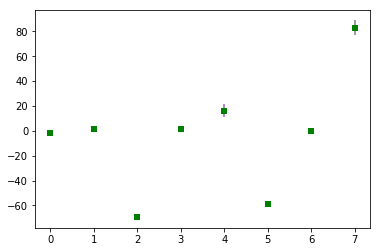

k (0.25003631771695684, 0.28714313173459111)
c (-59.981246155330666, -59.938929566064424)
a (0.011982924325935019, 0.02671606435237709)
vPeak (40.518503736661721, 49.236695406197569)
d (122.5258080314606, 129.25421114960045)
vr (-69.519719699949064, -60.507386217605678)
b (-1.990137179936275, 0.46640460410785578)
C (111.26084718411806, 119.06359007432766)


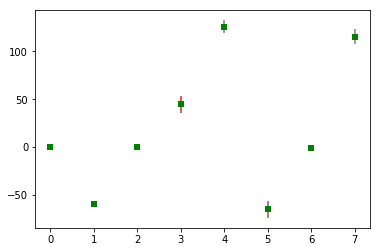

k (0.28668003461352293, 0.3038825739775658)
c (-59.809033954825814, -57.651596668961602)
a (0.018181728927776614, 0.026581766938247341)
vPeak (21.096815490013832, 38.479533893566334)
d (66.051977991707261, 129.06330198021138)
vr (-68.802942986187574, -68.580022754128947)
b (-0.73274323542348907, -0.73273906478534712)
C (80.020753836915858, 80.244628172254778)


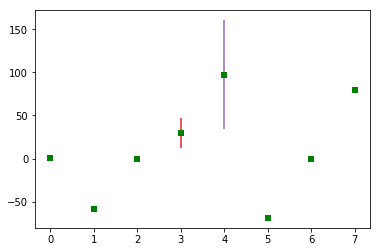

k (1.5350754405197153, 1.589087808338707)
c (-59.876527860076784, -51.035334438319573)
a (0.011123610681548103, 0.028845288931274526)
vPeak (45.599757889747906, 50.0)
d (10.229699008515759, 22.595928186621318)
vr (-69.79317065128717, -68.371982521705803)
b (14.39568098129161, 14.435690125765676)
C (115.3266308943135, 119.93347930985311)


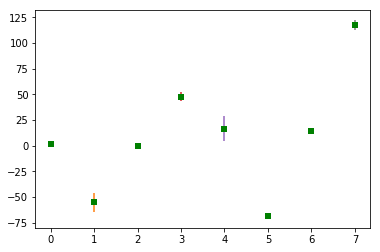

k (0.65499498763356834, 1.216749625676167)
c (-51.525082751285687, -50.0)
a (0.028027043917589287, 0.029750818413099494)
vPeak (44.907138853289119, 48.336903254771329)
d (10.0, 13.785309206221363)
vr (-64.42125640104436, -62.011768108729683)
b (-1.9384635312888356, -1.8424352064979832)
C (112.42922764369816, 119.92108076417809)


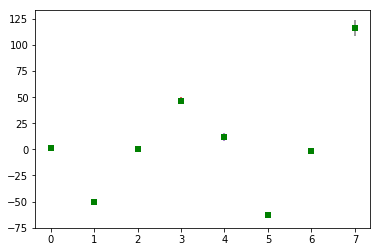

k (0.26452929992072266, 0.33897169613401201)
c (-58.011295761287677, -50.0)
a (0.01, 0.015120781830264961)
vPeak (45.477074458005283, 49.958372887438728)
d (10.237727633220278, 38.423219627322077)
vr (-64.988023152992938, -60.249266609933542)
b (-1.8481726860359209, -0.52978804073430119)
C (80.014138003429807, 82.980390639716518)


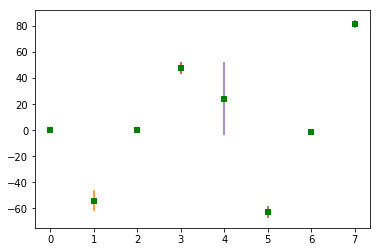

k (1.266113958229526, 1.5246032658616739)
c (-59.806013137245493, -56.580322168186889)
a (0.018780542783831386, 0.025893643799614573)
vPeak (45.398710831066069, 47.671846090420033)
d (13.234014413932078, 18.719712540667388)
vr (-67.910507356941608, -66.164057958859757)
b (1.0436551437826376, 3.3007521825634862)
C (80.0, 81.693914464780391)


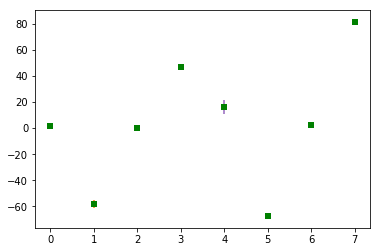

k (1.5711056323650188, 1.6000000000000001)
c (-59.994285611704967, -59.730476571609557)
a (0.010030222646625418, 0.014073969304916735)
vPeak (45.205174043000738, 50.0)
d (54.783916263119522, 127.18475646994929)
vr (-70.200806985415539, -69.183214567782315)
b (11.782064357372885, 14.98967759170152)
C (80.0, 118.83888626715934)


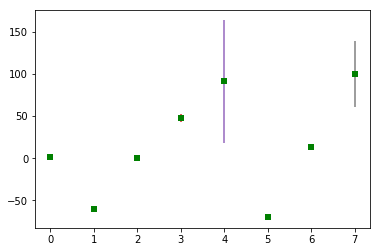

In [54]:
#errorbar
#for 
from matplotlib.pyplot import errorbar
import matplotlib.pyplot as plt

for v in test_opt.values():
    x = 0

    for k_,v_ in v['ranges'].items(): 
        #print(k_,v_)
        value = v_

        y = np.mean(value)
        err = max(value)-min(value)
        errorbar(x, y, err, marker='s', mfc='red',
                 mec='green', ms=2, mew=4,label='in '+str(k_))
        
        x+=1
    plt.show()


I consider the final gene populations for each of the eight tests. I compute the variance in each of the converged populations, I see that variance is low in many of the gene populations.

When all variables are used to optomize only against one set of parameters, you expect their would be high variance in parameters, that don't matter much with respect to that error criteria (you expect redundancy of solutions).

I compute std on errors over all the tests in order to estimate how amenable the problem is to multiobjective optimization.

InjectedCurrentAPThresholdTest 0.1680271511405247
CapacitanceTest 0.00013905695431160048
TimeConstantTest 7.439318018931385e-05
InjectedCurrentAPAmplitudeTest 0.2949842090850374
InputResistanceTest 0.0014010438057063812
InjectedCurrentAPWidthTest 0.011488089994029393
RestingPotentialTest 1.2012393795890475e-05
RheobaseTestP 0.025037183200593338


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

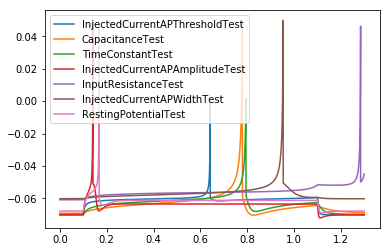

In [62]:
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import quantities as pq
for k,v in test_opt.items():    
    model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('RAW'))
    model.attrs = v['out']['pf'][1].dtc.attrs
    print(str(k), v['out']['pf'][1].dtc.get_ss())#fitness)
    iparams = {}
    iparams['injected_square_current'] = {}
    iparams['injected_square_current']['amplitude'] =v['out']['pf'][1].rheobase['value']*pq.pA
    #['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
    DELAY = 100.0*pq.ms
    DURATION = 1000.0*pq.ms
    iparams['injected_square_current']['delay'] = DELAY
    iparams['injected_square_current']['duration'] = int(DURATION)

    model.inject_square_current(iparams)

    plt.plot(model.get_membrane_potential().times,model.get_membrane_potential(),label=str(k))
    plt.legend()
plt.show()


In [17]:
'''
#print([i.fitness.values for i in test_opt['t'][0]['pop']])#.keys()
print(np.std([i[0] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()
print(np.std([i[1] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()
print(np.std([i[2] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()
print(np.std([i[3] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()
print(test_opt['t'][0]['pop'][0][0])
print(test_opt['t'][0]['pop'][0][1])
test_opt['t'][0]['pop'][0].dtc.attrs
'''

"\n#print([i.fitness.values for i in test_opt['t'][0]['pop']])#.keys()\nprint(np.std([i[0] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()\nprint(np.std([i[1] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()\nprint(np.std([i[2] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()\nprint(np.std([i[3] for i in test_opt['t'][0]['pop'][0:5]]))#.keys()\nprint(test_opt['t'][0]['pop'][0][0])\nprint(test_opt['t'][0]['pop'][0][1])\ntest_opt['t'][0]['pop'][0].dtc.attrs\n"

In [18]:

#values = { k:v for v in npcl['pop'][i].dtc.attrs.items() for i in npcl['pop'] }
print(values)    
print(stds.keys())
stds
#dtc.variances[k] for k in dtc.attrs.keys() 

NameError: name 'values' is not defined

In [ ]:

DO.seed_pop = npcl['pf'][0:MU]
npcl, DO = om.run_ga(explore_param,10,reduced_tests,free_params=free_params,hc = hc, NSGA = False, MU = MU, seed_pop = DO.seed_pop)


In [ ]:
attrs_here = npcl['hardened'][0][0].attrs
attrs_here.update(hc)
attrs_here
scores = npcl['hof'][0].dtc.scores
print(scores)

In [ ]:
#
use_test = test_frame["Neocortex pyramidal cell layer 5-6"]
reduced_tests = [use_test[0], use_test[-1], use_test[len(use_test)-1]]
bigger_tests = use_test[1:-2]
bigger_tests.insert(0,use_test[0])

In [ ]:
#bigger_tests = bigger_tests[-1::]
print(bigger_tests)

In [ ]:
DO.seed_pop = npcl['hof'][0:MU]
reduced_tests = [use_test[0], use_test[-1], use_test[len(use_test)-1]]
npcl, DO = om.run_ga(explore_param,10,bigger_tests,free_params=free_params,hc = hc, NSGA = False, MU = MU)#, seed_pop = DO.seed_pop)


In [ ]:
print(npcl['hardened'][0][0].attrs)
print(npcl['hardened'][0][0].scores)
print(npcl['pf'][0].fitness.values)
print(npcl['hof'][0].dtc.scores)

#for t in use_test:
#    print(t.name)
    
    
pop

# From the scores printed above, it looks like certain error criteria, are in conflict with each other.

Tests, that are amenable to co-optimization appear to be:
* Width test
* Input resistance tets
* Resting Potential Test,
* Capicitance test.
* Time constant

Tests/criteria that seem in compatible with the above include: 
* Rheobase, 
* InjectedCurrentAPThresholdTest
* InjectedCurrentAPAmplitudeTest

Therefore a reduced set of lists is made to check if the bottom three are at least amenable to optimization togethor.

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=2)
est.fit(X)
y_kmeans = est.predict(X)

centers = est.cluster_centers_

fig = plt.figure(fignum,figsize=(4,3))
ax = Axes3D(fig,rect=[0,0,.95,1],elav=48,azim=134)
ax.scatter(X[:,0],X[:,1],X[:,2],c=y_kmeans,s=50),
ax.scatter(centres[:,0],centres[:,1],centres[:,2],c='black',s=200,alpha=0.5)

In [ ]:

print(reduced_tests)
print(bigger_tests)

DO.seed_pop = npcl['pf'][0:MU]
npcl, DO = om.run_ga(explore_param,10,reduced_tests,free_params=free_params,hc = hc, NSGA = True, MU = 12)#, seed_pop = DO.seed_pop)


In [ ]:
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from neuronunit.optimization.optimization_management import wave_measure
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq
fig = plt.figure()

plt.clf()

from neuronunit.optimization.data_transport_container import DataTC
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
for i in npcl['pf'][0:2]:
    iparams = {}
    iparams['injected_square_current'] = {}
    iparams['injected_square_current']['amplitude'] =i.dtc.rheobase
    model = None
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(i.dtc.attrs)

    #['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
    DELAY = 100.0*pq.ms
    DURATION = 1000.0*pq.ms
    iparams['injected_square_current']['delay'] = DELAY
    iparams['injected_square_current']['duration'] = int(DURATION)
    model.inject_square_current(iparams)
    n_spikes = len(model.get_spike_train())
    if n_spikes:
        print(n_spikes)
        #print(i[0].scores['RheobaseTestP']*pq.pA)
        plt.plot(model.get_membrane_potential().times,model.get_membrane_potential())#,label='ground truth')
        plt.legend()

#gca().set_axis_off()
#subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0, wspace = 0)
#margins(0,0)
#gca().xaxis.set_major_locator(NullLocator())
#gca().yaxis.set_major_locator(NullLocator())

plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.1)
fig.tight_layout()
plt.show()

fig.savefig("single_trace.png", bbox_inches = 'tight',
    pad_inches = 0)


In [ ]:
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot


from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq
fig = plt.figure()

plt.clf()

from neuronunit.optimization.data_transport_container import DataTC
for i in npcl['hardened']:
    iparams = {}
    iparams['injected_square_current'] = {}
    iparams['injected_square_current']['amplitude'] = i[0].rheobase
    model = None
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(i[0].attrs)

    #['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
    DELAY = 100.0*pq.ms
    DURATION = 1000.0*pq.ms
    iparams['injected_square_current']['delay'] = DELAY
    iparams['injected_square_current']['duration'] = int(DURATION)
    model.inject_square_current(iparams)
    n_spikes = len(model.get_spike_train())
    if n_spikes:
        print(n_spikes)
        print(i[0].scores['RheobaseTestP']*pq.pA)
        plt.plot(model.get_membrane_potential().times,model.get_membrane_potential())#,label='ground truth')
        plt.legend()

#gca().set_axis_off()
#subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0, wspace = 0)
#margins(0,0)
#gca().xaxis.set_major_locator(NullLocator())
#gca().yaxis.set_major_locator(NullLocator())

plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.1)
fig.tight_layout()
plt.show()

fig.savefig("single_trace.png", bbox_inches = 'tight',
    pad_inches = 0)


'''
hc = {}

#free_params = ['c','k']
for k,v in explore_param.items():
    if k not in free_params:
        hc[k] = v
constants = npcl['hardened'][0][0].attrs
hc.update(constants) 
npcl, _ = om.run_ga(explore_param,20,test_frame["Neocortex pyramidal cell layer 5-6"],free_params=free_params,hc = hc, NSGA = True)
'''

In [ ]:

free_params = ['a','b','k']#vt','c','k','d']#,'vt','k','c','C']#,'C'] # this can only be odd numbers.

##
# Use information that is available
##
hc = reduced_cells['RS']

hc['vr'] = -65.2261863636364

hc['vPeak'] = hc['vr'] + 86.364525297619
hc['C'] = 89.7960714285714
hc.pop('a',0)
hc.pop('b',0)
hc.pop('k',0)
hc.pop('c',0)
hc.pop('d',0)
        
use_test = test_frame["Neocortex pyramidal cell layer 5-6"]
DO.seed_pop = npcl['pf']
ga_out = DO.run(max_ngen = 15)
'''
hc = {}

free_params = ['C']

for k,v in explore_param.items():
    if k not in free_params:
        hc[k] = v
#,'vt','k','c','C']#,'C'] # this can only be odd numbers
constants = npcl['hardened'][0][0].attrs
hc.update(constants) 
npcl, _ = om.run_ga(explore_param,20,test_frame["Neocortex pyramidal cell layer 5-6"],free_params=free_params,hc = hc, NSGA = True)
'''

In [ ]:
'''
import pandas
    
try:
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')
    !ls -ltr *.csv
except:
    !wget https://neuroelectro.org/static/src/article_ephys_metadata_curated.csv
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')

blah = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]
#ne_raw['NeuronName']
#ne_raw['cell\ capacitance']
#blah = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]

print([i for i in blah.columns])
#rint(blah['rheobase'])
#print(blah)
#for i in ne_raw.columns:#['NeuronName']:
#    print(i)

#ne_raw['NeuronName'][85]
#blah = ne_raw[ne_raw['TableID'].str.match('85')]
#ne_raw['n'] = 84
#here = ne_raw[ne_raw['Index']==85]
here = ne_raw[ne_raw['TableID']==18]

print(here['rheo_raw'])
#!wget https://neuroelectro.org/apica/1/n/
'''

In [ ]:
ca1 = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]
ca1['rheo']

In [ ]:

    
test_frame["Dentate gyrus basket cell"][0].observation['std'] = test_frame["Dentate gyrus basket cell"][0].observation['mean']
for t in test_frame["Dentate gyrus basket cell"]:
    print(t.name)

    print(t.observation)
    


'''
Inibitory Neuron
This can't pass the Rheobase test
'''    

In [ ]:

from neuronunit.optimization import optimization_management as om
import pickle

free_params = ['a','vr','b','vt','vPeak','c','k']
for k,v in explore_param.items():
    if k not in free_params:
        hc[k] = v
use_test = test_frame["Dentate gyrus basket cell"]
bcell, _ = om.run_ga(explore_param,20,use_test,free_params=free_params,hc = hc, NSGA = True, MU = 4)


In [ ]:

    
#test_frame["Dentate gyrus basket cell"][0].observation['std'] = test_frame["Dentate gyrus basket cell"][0].observation['mean']
for t in test_frame["Hippocampus CA1 pyramidal cell"]:
    print(t.name)

    print(t.observation)

In [ ]:
use_test = test_frame["Hippocampus CA1 pyramidal cell"]
bcell, _ = om.run_ga(explore_param,20,use_test,free_params=free_params,hc = hc, NSGA = True, MU = 10)


In [ ]:
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuronunit.models.reduced import ReducedModel
from neuronunit.optimization.model_parameters import model_params, path_params
LEMS_MODEL_PATH = path_params['model_path']
import neuronunit.optimization as opt
import quantities as pq
fig = plt.figure()

plt.clf()

from neuronunit.optimization.data_transport_container import DataTC
for i in bcell['hardened'][0:6]:
    iparams = {}
    iparams['injected_square_current'] = {}
    iparams['injected_square_current']['amplitude'] =i[0].rheobase
    model = None
    model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
    model.set_attrs(i[0].attrs)

    #['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
    DELAY = 100.0*pq.ms
    DURATION = 1000.0*pq.ms
    iparams['injected_square_current']['delay'] = DELAY
    iparams['injected_square_current']['duration'] = int(DURATION)
    model.inject_square_current(iparams)
    n_spikes = len(model.get_spike_train())
    if n_spikes:
        print(n_spikes)
        print(i[0].scores['RheobaseTestP']*pq.pA)
        plt.plot(model.get_membrane_potential().times,model.get_membrane_potential())#,label='ground truth')
        plt.legend()

#gca().set_axis_off()
#subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#            hspace = 0, wspace = 0)
#margins(0,0)
#gca().xaxis.set_major_locator(NullLocator())
#gca().yaxis.set_major_locator(NullLocator())

plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.1)
fig.tight_layout()
plt.show()

fig.savefig("single_trace.png", bbox_inches = 'tight',
    pad_inches = 0)


In [ ]:
use_test = test_frame["Hippocampus CA1 pyramidal cell"]
bcell, _ = om.run_ga(explore_param,20,use_test,free_params=free_params,hc = hc, NSGA = True, MU = 10)
